**Исследование стоимости квартир**

Имеются данные сервиса недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Главная задача — определить основные параметры для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность. 

**Данные** храняться в файле datasets/real_estate_data.csv. Часть данных заполнена пользователем, а часть заполнена автоматически по картам (расстояние до центра, аэропорта, ближайшего парка и водоёма). Описание данных:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* city_centers_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**План работы:**
1. Загрузка данных
2. Предобработка данных
3. Исседовательский анализ данных
4. Общий вывод



In [1]:
# Импорт библиотек
import pandas as pd
import seaborn

# Изучение данных из файла

In [2]:
df = pd.read_csv('F:/Yandex-Practicum/datasets/real_estate_data.csv',sep='\t')
df.head() 
df.info() # просмотр размера таблицы, типов данных, количества non-null
df.columns # проверка отсутсвия лишних пробелов в названии столбцов


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
df = df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'}) # переименование столбца в змеимый регистр
df.head() # просмотр первых строк данных

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  city_сenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

## Вывод

В таблице 23699 записей по 22 параметра, в 14 столбцах присутствуют пропуски, 14 столбцов с вещественными значениями.

Столбцы last_price, floors_total, balcony,airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest,days_exposition по возможности перевести в int.

Название столбца cityCenters_nearest было не в змеином регистре, заменено на city_сenters_nearest.

# Предобработка данных

## План предобработки данных

1. Проверить наличие пропусков в данных, заполнить пропуски
2. Преобразовать типы данных (вещественные данные в целочисленные и время)
3. Проверить наличие дубликатов, обработать дубликаты
4. Лемматизировать цели кредита для их категоризации
5. Категоризировать данные и создать соответствующие словари для упрощения последующего анализа данных

## Обработка пропусков


Пропуски присутствуют в 14 столбцах из 22

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Анализ пропусков
1. В столбце высоты потолков примерно треть объявлений с пропусками. Пропуски можно заменить на медианное значение, можно было бы восстановить по типу дома, если был бы адрес дома. Высота потолков влияет на привлекательность, поэтому при подаче объявлений увеличенную высоту указывают как конкурентное преимущество, поэтому если высота не указана, то можно заменить на типичную высоту квартир.

2. В общем количестве этажей пропусков меньше 1 %, посмотреть записи, попробовать восстановить по этажу квартиры и населенному пункту.

3. В жилой площади пропусков 8 %, восстановить по медианному значению для квартир с таким же количеством комнат.

4. Аппартаменты. Примерно 90 % пропусков. Восстановить "не аппартаментами".

5. Площадь кухни, проанализировать записи с пропусками. 

6. Балконы. Пропуски заменить нулевыми значениями.

7. Название населённого пункта. Проверить максимальную этажность по СПБ и другим населенным пунктам. Если высокая этажность (5 и выше) только в СПБ, то восстановить СПБ, иначе исключить.

8. Расстояния до аэропорта, центра, парка, водоема пропущено у примерно одинакового количества объявлений, проверить в одних и тех же объявлениях пропуски или нет. Возможно не указан адрес или ошибка в адресе, поэтому не могут быть определены расстояния, возможно указано, что поблизости их нет. 

9. Количество парков и водоемов пропущено больше чем у половины, примерно одинаковое количество, проверить одни и те же записи или нет.

10. Сколько дней было размещено объявление, возможно объявление еще не снято и квартира не продана. 


### Высота потолков

In [5]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Есть записи со слишком маленькими (до 2 м)и большими высотами, нужно проверить записи и их количество

In [6]:
print('распределение по высоте потолков\n', df.groupby('ceiling_height')['last_price'].count())

#замена пропущенных значений на медианную высоту повлияет на зависимости от высоты, добавляю новый столбец с данными о восстановлении высоты 
#df['ceiling_height'].median()#медианное значение 2,65
df['is_restored_ceiling_height'] = df['ceiling_height'].isna() # столбец с данными о факте восстановления высоты 
df['ceiling_height'].fillna(df['ceiling_height'].median(),inplace=True)

# высоту потолков от 1 до 1.75 увеличиваю на 1 м, в яндекс.недвижимости есть объявления с высотой потолков от 2м. https://realty.yandex.ru/offer/1021538880746178561/?isExact=YES
#df['ceiling_height'].hist(bins=183,range=(1,2))
(df['ceiling_height'].
 where(~((df['ceiling_height'] >= 1)
         &(df['ceiling_height'] < 2))
       , df['ceiling_height'] + 1
       , inplace=True))
#df.query('ceiling_height <=2').sort_values('ceiling_height')

# высоту потолков от 20 до 32 м уменьшаю в 10 раз
#df['ceiling_height'].hist(bins=183,range=(5,100))
(df['ceiling_height'].
 where(~((df['ceiling_height'] >= 20)
         &(df['ceiling_height'] <= 32))
       , df['ceiling_height'] * 0.1
       , inplace=True))
#df.query('ceiling_height >10').sort_values('ceiling_height')

# одно объявление с высотой потолков 100 м можно удалить, т.к. не похоже на реальное, фото нет, цена 600 т.р/м кв, или в дальнейшем исключить из рассмотрения

#df['ceiling_height'].hist(bins=176, range=(2,5)) 
df.head(5)
df = df.query('ceiling_height < 100')


распределение по высоте потолков
 ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: last_price, Length: 183, dtype: int64


#### Вывод

Примерно в трети объявлений пропущена высота, пропущенные значения восстановлены медианным значением. 
В записях присутсвовали записи с аномальными высотами, которые можно скорректировать: высоты в диапазоне 1-1,75 м увеличены на 1 м; высоты 20-32 м уменьшены в 10 раз, так как вероятно допущена опечатка в месте постановки разделителя дробной части.

### Количество этажей

В общем количестве этажей пропусков меньше 1 %, необходимо посмотреть записи, попробовать восстановить по этажу квартиры и населенному пункту.


3375

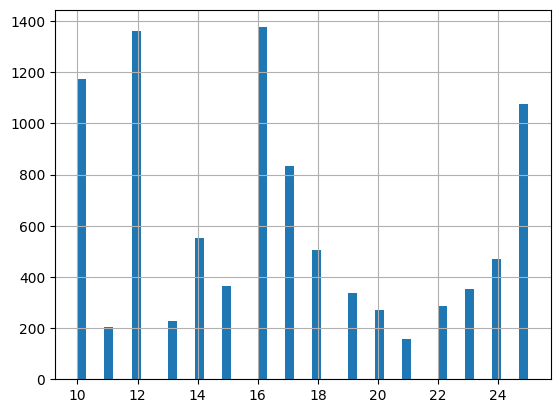

In [7]:
df['floors_total'].hist(bins=50, range=(10,25))
#df[df['floors_total'].isna()].groupby('locality_name').count() # распределение пропусковпо населенным пунктам 
#df[(df['floors_total'].isna())&(df['locality_name'] !='Санкт-Петербург')] # проверка этажей вне спб
#df[df['floors_total'].isna()]['floor'].hist(bins=50)
#df['floors_total'].fillna(-1, inplace=True)
#df = df[df['floors_total'].isna()] # для проверки процента последних и изменения списка
#display(df)
#print(df[(df['floors_total'].isna())&(df['floor'] in [5,9,12,16,25])]['floor'].count())
for i in [5,9,12,16,25]:
    df['floors_total'].where(~((df['floors_total'].isna())&(df['floor'] <= i)), i, inplace=True)
#df
#df['floors_total'].describe()
df[df['floors_total'] == df['floor']]['floor'].count()

#### Вывод

Из 86 записей с пропусками в СПБ - 70, 16 - "пригороды", этажы в пригородах от 1 до 21-го, т.е. не ниже, чем  в СПБ.
Вариант восстановления: квартира на 1-5 этаже - пятиэтажка, 6-9 -- 9-этажка, 10-12 -- 12этажка, 13-16 -- 16этажка, 17-21 -- 25 этажка. Так как распределение этажности мультимодальное с модами в данных этажностях. Восстановление слабо повлияет на итоговые зависимости из-за малого количества пропусков.
При такой замене процент последних этажей 17,8% среди пропусков, а в исходном списке процент последних этажей 14,2%.

### Жилая площадь

В жилой площади пропусков 8 %, можно восстановить по медианному значению для квартир с таким же количеством комнат.



распределение по жилой площади
 living_area
2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: last_price, Length: 1782, dtype: int64


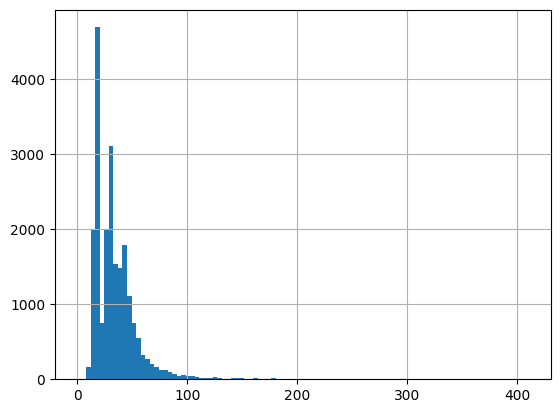

In [8]:
df['living_area'].describe()
print('распределение по жилой площади\n', df.groupby('living_area')['last_price'].count())
df['living_area'].hist(bins=100,range=(0,410))
df['is_restored_living_area'] = df['living_area'].isna() # столбец с данными о факте восстановления площади 
living_area_dict = df.groupby('rooms')['living_area'].median().to_dict()
#df['ceiling_height'].fillna(df['ceiling_height'].median(),inplace=True)
# print(df[df['living_area'].isna()].groupby('rooms')['last_price'].count()) # для проверки замены
for i in df[df['living_area'].isna()]['rooms'].unique():
    df['living_area'].where(~(df['is_restored_living_area']&(df['rooms'] == i)), living_area_dict[i],inplace=True)
# df[df['is_restored_living_area']]['living_area'].hist(bins=100) # для проверки замены

#### Вывод

8% объявлений с пропущенной жилой площадью, пропущенные значения восстановлены медианными значениями жилой площади для квартир с таким же количеством комнат. Нужно проверить влияние на итоговый результат, для этого добавил логический столбец восстановлена ли площадь. 
В непустых значениях присутствуют маленькие величины в несколько м кв, возможно продажа долей квартир/комнат, либо некорректные данные.

### Аппартаменты

Примерно 90 % пропусков, восстанавливаю "не аппартаментами".



In [9]:
print ('Изначальная доля аппартаментов:', df[df['is_apartment']==True].shape[0]/df[df['is_apartment'] == False].shape[0])
df['is_apartment'].fillna(False, inplace=True) # в итоговых результатах не участвует, заменяю пропуски на "не аппартаменты"
#df[df['is_apartment'].isna()].shape[0]

Изначальная доля аппартаментов: 0.01798165137614679


#### Вывод

90% объявлений с пропущенными занчениями "аппартаменты". В изначально заполненных данных 1,8% объявлений аппартаменты. В итоговых зависимостях позиция не исследуется, поэтому заменяю пропуски на "не аппартаменты", после заполнения пропусков аппартаментов всего 0,2%, можно удалить столбец. 

### Площадь кухни


In [10]:
df['kitchen_area'].fillna(0, inplace=True)

#### Вывод

Пропуски в площади кухни заменил на 0

### Балконы

Пропуски заменить нулевыми значениями.

In [11]:
df['balcony'].fillna(0, inplace=True)


#### Вывод

Пропуски в количестве заменил на 0

### Название населённого пункта

In [12]:
#Для анализа и сравнения расстояний объявлений с пропусками, с объявлениями из СПБ и не из СПБ
df[df['locality_name'].isna()].info()
#display(df[df['locality_name'].isna()].describe())
#display(df[df['locality_name'] == 'Санкт-Петербург'].describe())
#df[df['locality_name'] != 'Санкт-Петербург'].describe()
df['locality_name'].fillna('Санкт-Петербург', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1097 to 23214
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                49 non-null     int64  
 1   last_price                  49 non-null     float64
 2   total_area                  49 non-null     float64
 3   first_day_exposition        49 non-null     object 
 4   rooms                       49 non-null     int64  
 5   ceiling_height              49 non-null     float64
 6   floors_total                49 non-null     float64
 7   living_area                 49 non-null     float64
 8   floor                       49 non-null     int64  
 9   is_apartment                49 non-null     bool   
 10  studio                      49 non-null     bool   
 11  open_plan                   49 non-null     bool   
 12  kitchen_area                49 non-null     float64
 13  balcony                     49 

#### Вывод

Из 49 пропусков 41 имеют расстояния до центра и аэропорта, медианные значения этих расстояний (24 км и 11 км) для СПБ и для этих 41 строки примерно равны, для пригородов медианные значения больше. Но максимальные значения расстояний с пропусками больше максимальных расстояний объявлений из СПБ. Кроме того, медианное значение населенного пункта - СПБ. 
Восстанавливаю все пропуски значением СПБ, в том числе 8 строк без расстояний.

### Расстояния до аэропорта, центра, количество парков и водоемов

Расстояния до аэропорта, центра, парка, водоема пропущено у примерно одинакового количества объявлений, проверить в одних и тех же объявлениях пропуски или нет.

In [13]:
df[(df['airports_nearest'].isna())|(df['city_сenters_nearest'].isna())].info()
#display(df[(df['airports_nearest'].isna())&(df['city_сenters_nearest'].isna())&(df['parks_nearest'].isna())&(df['ponds_nearest'].isna())&(df['locality_name'] == 'Санкт-Петербург')])
df['airports_nearest'].fillna(-10000, inplace=True)
df['city_сenters_nearest'].fillna(-10000, inplace=True)
df['parks_around3000'].fillna(-10, inplace=True)
df['ponds_around3000'].fillna(-10, inplace=True)






<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 5 to 23698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                5543 non-null   int64  
 1   last_price                  5543 non-null   float64
 2   total_area                  5543 non-null   float64
 3   first_day_exposition        5543 non-null   object 
 4   rooms                       5543 non-null   int64  
 5   ceiling_height              5543 non-null   float64
 6   floors_total                5543 non-null   float64
 7   living_area                 5543 non-null   float64
 8   floor                       5543 non-null   int64  
 9   is_apartment                5543 non-null   bool   
 10  studio                      5543 non-null   bool   
 11  open_plan                   5543 non-null   bool   
 12  kitchen_area                5543 non-null   float64
 13  balcony                     5543

#### Вывод
Примерно 5500 записей с пропусками одновременно в столбцах расстояний до аэропорта и центра, кол-ва парков и водоемов.
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
ponds_around3000         5518
Записи с пропущенными расстояниями, получены в основном для "пригородов" СПБ. Вероятно пропуски обусловлены особенностями автоматического определения расстояний на основе картографических данных. Возможно не указан адрес или ошибка в адресе, поэтому не могут быть определены расстояния.

Заполняю пропуски в ячейках заметными выбивающимися значениями -10000 (расстояния) и -10 (количество).
 

### Расстояния до парков и водоемов


In [14]:
df[df['parks_nearest'].isna()].info()
display(df[df['parks_nearest'].isna()].groupby('parks_around3000').count())
display(df[df['ponds_nearest'].isna()].groupby('ponds_around3000').count())
df['parks_nearest'].fillna(-10000, inplace=True)
df['ponds_nearest'].fillna(-10000, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15620 entries, 1 to 23698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                15620 non-null  int64  
 1   last_price                  15620 non-null  float64
 2   total_area                  15620 non-null  float64
 3   first_day_exposition        15620 non-null  object 
 4   rooms                       15620 non-null  int64  
 5   ceiling_height              15620 non-null  float64
 6   floors_total                15620 non-null  float64
 7   living_area                 15620 non-null  float64
 8   floor                       15620 non-null  int64  
 9   is_apartment                15620 non-null  bool   
 10  studio                      15620 non-null  bool   
 11  open_plan                   15620 non-null  bool   
 12  kitchen_area                15620 non-null  float64
 13  balcony                     156

total_images  last_price  total_area  first_day_exposition  \
parks_around3000                                                               
-10.0                     5518        5518        5518                  5518   
 0.0                     10102       10102       10102                 10102   

                  rooms  ceiling_height  floors_total  living_area  floor  \
parks_around3000                                                            
-10.0              5518            5518          5518         5518   5518   
 0.0              10102           10102         10102        10102  10102   

                  is_apartment  ...  balcony  locality_name  airports_nearest  \
parks_around3000                ...                                             
-10.0                     5518  ...     5518           5518              5518   
 0.0                     10102  ...    10102          10102             10102   

                  city_сenters_nearest  parks_nearest  ponds_around3000  \
parks_around3000                                                          
-10.0                             5518              0              5518   
 0.0                             10102              0             10102   

                  ponds_nearest  days_exposition  is_restored_ceiling_height  \
parks_around3000                                                               
-10.0                         0             4653                        5518   
 0.0                       4286             8931                       10102   

                  is_restored_living_area  
parks_around3000                           
-10.0                                5518  
 0.0                                10102  

[2 rows x 23 columns]

total_images  last_price  total_area  first_day_exposition  \
ponds_around3000                                                               
-10.0                     5518        5518        5518                  5518   
 0.0                      9071        9071        9071                  9071   

                  rooms  ceiling_height  floors_total  living_area  floor  \
ponds_around3000                                                            
-10.0              5518            5518          5518         5518   5518   
 0.0               9071            9071          9071         9071   9071   

                  is_apartment  ...  balcony  locality_name  airports_nearest  \
ponds_around3000                ...                                             
-10.0                     5518  ...     5518           5518              5518   
 0.0                      9071  ...     9071           9071              9071   

                  city_сenters_nearest  parks_around3000  parks_nearest  \
ponds_around3000                                                          
-10.0                             5518              5518              0   
 0.0                              9071              9071           3255   

                  ponds_nearest  days_exposition  is_restored_ceiling_height  \
ponds_around3000                                                               
-10.0                         0             4653                        5518   
 0.0                          0             7971                        9071   

                  is_restored_living_area  
ponds_around3000                           
-10.0                                5518  
 0.0                                 9071  

[2 rows x 23 columns]

#### Вывод

Расстояния до парков и водоемов пропущено у примерно 15 тыс объявлений (60%). В 11тыс объявлений отсутствуют обе позиции, и по 4 тыс строк с пропусками либо первого, либо второго.
Отсутсвует расстояние до парка в строках с нулевым количеством парков (10 тыс) или с пропуском количества парков (5.5 тыс).
Если парков поблизости нет, то расстояние до него можно заполнить заметным выбивающимся числом -10000.
Аналогичная ситуация с водоемами: Отсутсвует расстояние в строках с нулевым количеством водоемов (9 тыс) или с пропуском количества водоемов (5.5 тыс). заполняю заметным выбивающимся числом -10000.

### Количество дней размещения объявления


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                3181 non-null   int64  
 1   last_price                  3181 non-null   float64
 2   total_area                  3181 non-null   float64
 3   first_day_exposition        3181 non-null   object 
 4   rooms                       3181 non-null   int64  
 5   ceiling_height              3181 non-null   float64
 6   floors_total                3181 non-null   float64
 7   living_area                 3181 non-null   float64
 8   floor                       3181 non-null   int64  
 9   is_apartment                3181 non-null   bool   
 10  studio                      3181 non-null   bool   
 11  open_plan                   3181 non-null   bool   
 12  kitchen_area                3181 non-null   float64
 13  balcony                     3181

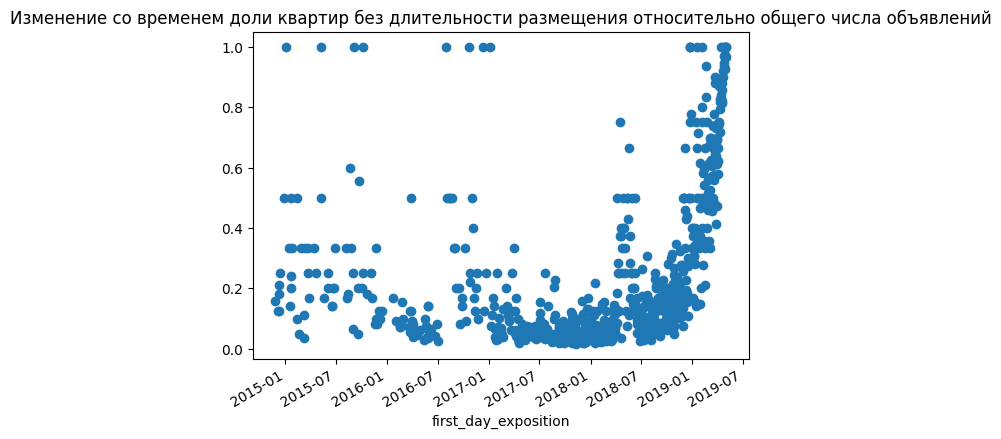

In [15]:
df[df['days_exposition'].isna()].info()
# замена столбца даты первого размещения
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Изменение доли квартир без длительности размещения относительно общего числа объявлений
( (df[df['days_exposition'].isna()].groupby('first_day_exposition')['last_price'].count()
   / df.groupby('first_day_exposition')['last_price'].count())
 .plot(style='o',title='Изменение со временем доли квартир без длительности размещения относительно общего числа объявлений')
)
df['days_exposition'].fillna(-5,inplace=True)

#### Вывод
У 3 тыс объявлений пропущена длительность размещения. Были проанализированы даты размещения. База выгружена 03.05.2019, часть объявлений на эту дату еще не закрыта, поэтому отсутствуют данные о длительности размещения. На графике видно, что для всего диапазона дат есть не снятые объявления, однако ближе к дате выгрузке базы, доля возрастает до 1, в связи с тем, что данные объявления не закрыты. Пропуски заполнены нетипичным значением -5, в статистику по длительности продажи объявления включены не будут.

### Стоимость
одно значение стоимости меньше 0.2 млн, умножаю цену на 1000, видимо опечатка в размерности

In [16]:
display(df[df['last_price'] < 2e5])
(df['last_price'].where(~(df['last_price'] < 2e5), df['last_price'] * 1e3, inplace=True))

total_images  last_price  total_area first_day_exposition  rooms  \
8793             7     12190.0       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
8793            2.75          25.0         32.0     25         False  ...   

        locality_name  airports_nearest  city_сenters_nearest  \
8793  Санкт-Петербург           36421.0                9176.0   

      parks_around3000 parks_nearest  ponds_around3000  ponds_nearest  \
8793               1.0         805.0               0.0       -10000.0   

      days_exposition  is_restored_ceiling_height  is_restored_living_area  
8793              8.0                       False                    False  

[1 rows x 24 columns]

## Изменение типов данных

Преобразование вещественных данных в целочисленные
Столбцы last_price, floors_total, balcony, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition переводятся в int, при этом расстояния дополнительно переводятся в километры.
Тип данных даты размещения изменен выше 

In [17]:
#display(df.dtypes)# проверка типов до изменения
# преобразование данных столбцов в целые числа путем отбрасывания дробной части
for i in ['last_price', 'floors_total','balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    df[i]= df[i].astype('int')

df.loc[:,['airports_nearest','parks_nearest', 'ponds_nearest','city_сenters_nearest']] = (df[['airports_nearest','parks_nearest', 'ponds_nearest','city_сenters_nearest']]* 0.001).round().astype('int')

   
display(df.dtypes) # проверка типов после изменения


total_images                           int64
last_price                             int32
total_area                           float64
first_day_exposition          datetime64[ns]
rooms                                  int64
ceiling_height                       float64
floors_total                           int32
living_area                          float64
floor                                  int64
is_apartment                            bool
studio                                  bool
open_plan                               bool
kitchen_area                         float64
balcony                                int32
locality_name                         object
airports_nearest                       int32
city_сenters_nearest                   int32
parks_around3000                       int32
parks_nearest                          int32
ponds_around3000                       int32
ponds_nearest                          int32
days_exposition                        int32
is_restore

#### Вывод 

Выполнено преобразование вещественных данных в целочисленные для столбцов last_price, floors_total, balcony, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 
При этом расстояния дополнительно переводятся в километры. 
Тип данных даты размещения изменен выше в 2.2.10

# Расчёты и добавление результатов в таблицу

## План дорасчетов

1. Цена квадратного метра

2. День недели, месяц и год публикации объявления

3. Этаж квартиры; варианты — первый, последний, другой

4. соотношение жилой и общей площади, а также отношение площади кухни к общей


In [18]:
# 1. Цена квадратного метра
df['price_sq_m'] = (df['last_price'] / df['total_area']).astype('int')

# 2. День недели, месяц и год публикации объявления
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

#3. Этаж квартиры; варианты — первый, последний, другой
df['floor_type'] = 'другой'
df['floor_type'].where(df['floor'] != 1, 'первый', inplace=True)
df['floor_type'].where(df['floor'] != df['floors_total'],'последний', inplace=True)

# 4. соотношение жилой и общей площади, а также отношение площади кухни к общей
df['area_ratio_living_total'] = (df['living_area'] / df['total_area'])
df['area_ratio_kitchen_total'] = (df['kitchen_area'] / df['total_area'])

### Вывод 

Выполнен дорасчет следующих параметров:
1. Цена квадратного метра

2. День недели, месяц и год публикации объявления

3. Этаж квартиры; варианты — первый, последний, другой

4. соотношение жилой и общей площади, а также отношение площади кухни к общей


# Исследовательский анализ данных

## Анализ параметров: площадь, цена, число комнат, высота потолков
построение гистограмм для каждого параметра


Text(0.5, 0, 'Площадь, кв м')

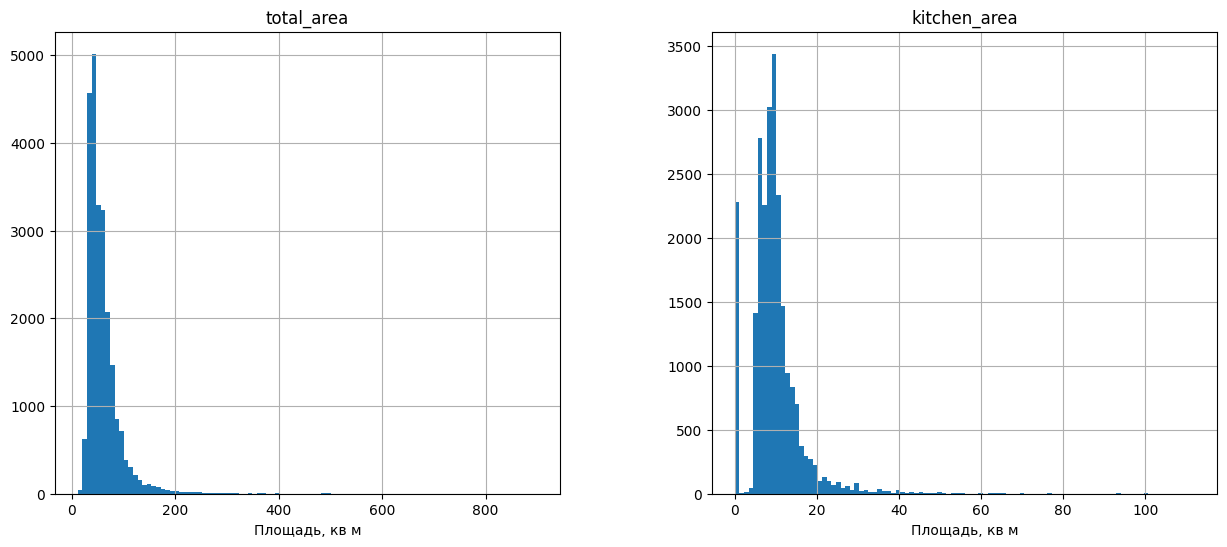

In [19]:
#ax1 = df.loc[:,['total_area','kitchen_area']].plot(kind='hist', bins=100, figsize=(5,6),title='Гистограммы общей площади и площади кухни',subplots=True,grid=True)
ax2=df.loc[:,['total_area','kitchen_area']].hist(bins=100, figsize=(15,6),grid=True)
#ax1[-1].set_xlabel('Площадь, кв м')
df.loc[:,['total_area','kitchen_area','living_area']].describe()
ax2[0,0].set_xlabel('Площадь, кв м')
ax2[0,1].set_xlabel('Площадь, кв м')

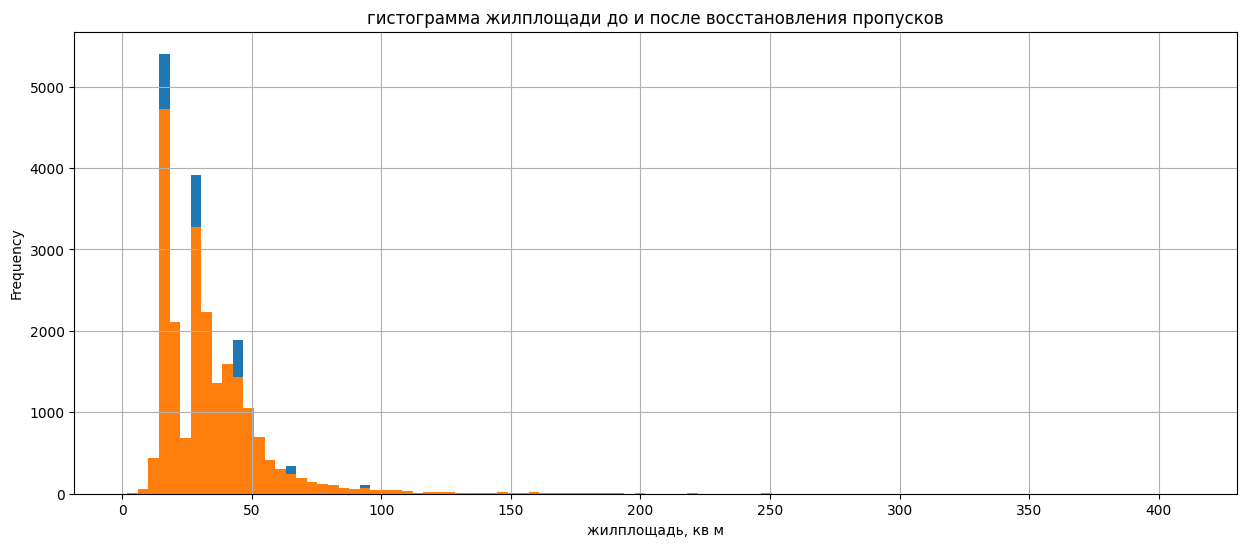

In [20]:
df['living_area'].plot(kind='hist', bins=100, figsize=(15,6)).set_xlabel('жилплощадь, кв м')
df[~df['is_restored_living_area']]['living_area'].plot(kind='hist', bins=100, figsize=(15,6), title='гистограмма жилплощади до и после восстановления пропусков', grid=True);


last_price    price_sq_m
count  2.369800e+04  2.369800e+04
mean   6.541706e+06  9.940480e+04
std    1.088708e+07  5.019858e+04
min    4.300000e+05  7.962000e+03
25%    3.400000e+06  7.659250e+04
50%    4.650000e+06  9.500000e+04
75%    6.800000e+06  1.142515e+05
max    7.630000e+08  1.907500e+06

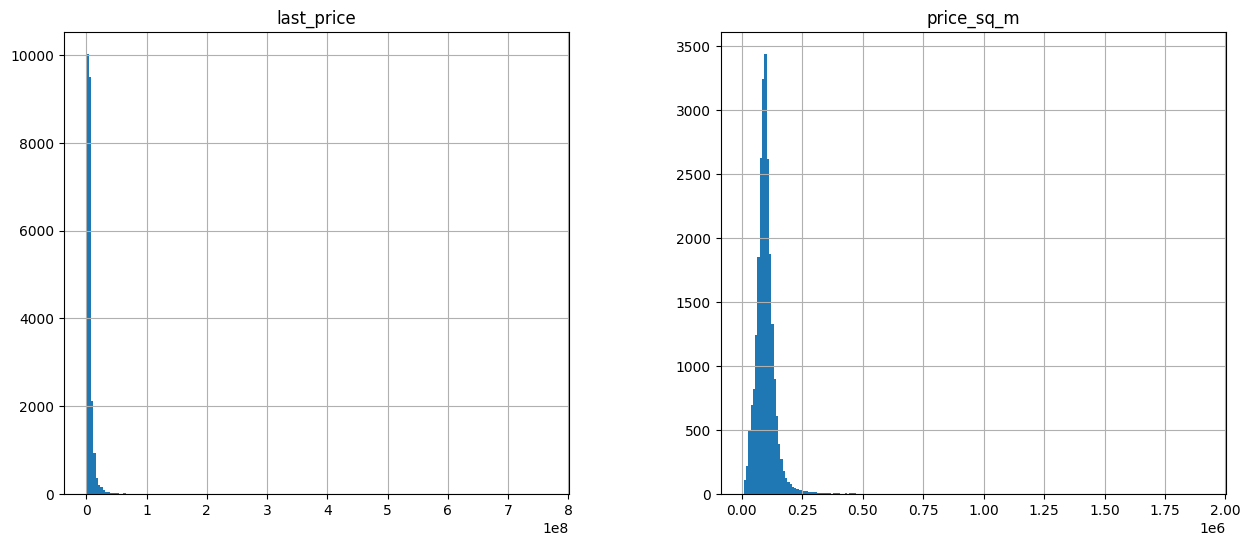

In [21]:
df.loc[:,['last_price','price_sq_m']].hist(bins=200, figsize=(15,6))
df.loc[:,['last_price','price_sq_m']].describe()

count    23698.000000
mean         2.070681
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

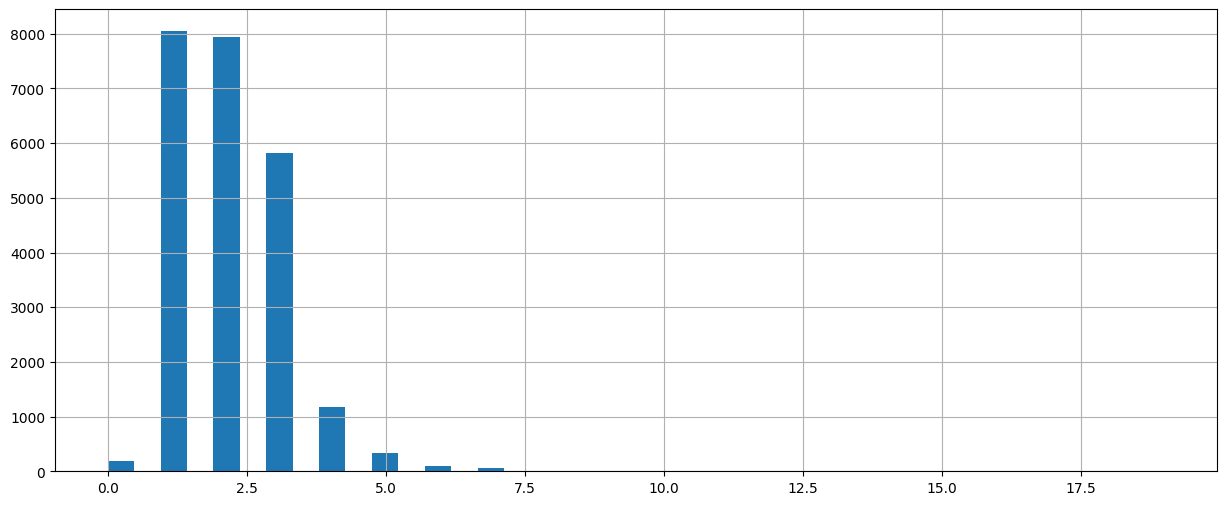

In [22]:
df['rooms'].hist(bins=40, figsize=(15,6))
df['rooms'].describe()

count    23698.000000
mean         2.698539
std          0.248282
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

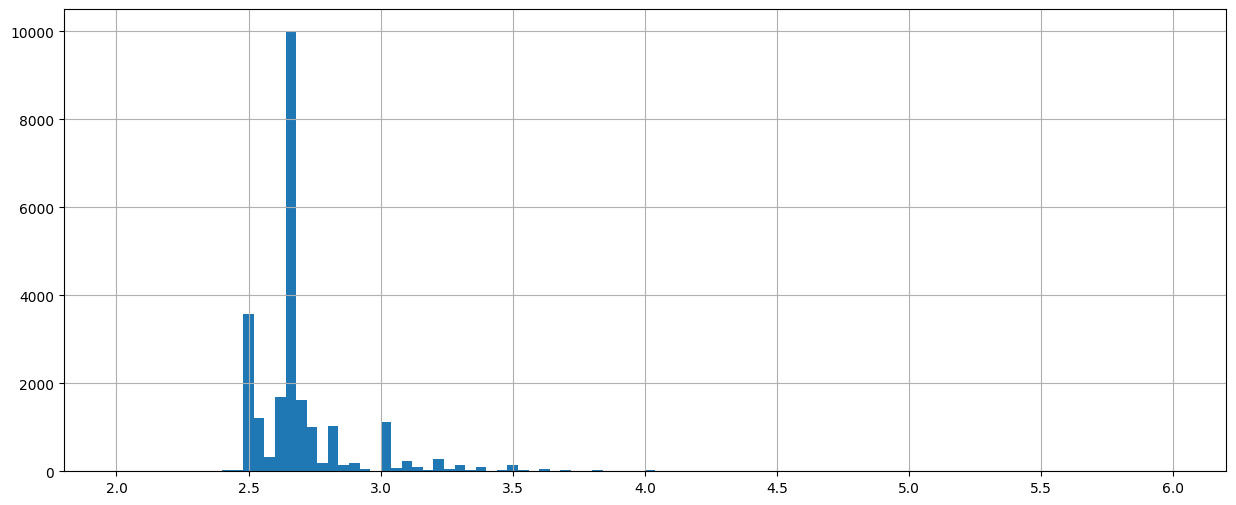

In [23]:
df['ceiling_height'].hist(bins=100, range=(2, 6), figsize=(15,6))
df['ceiling_height'].describe()

### Вывод по анализу параметров

Площади общая и кухни имеют Пуассоновское распределение, жилплощадь  мультимодальная. Заполнение пропущенных значений жилплощади усилило медианы, в целом не сильно исказило распределение.  Распределения всех площадей имеют длинные хвосты, т.к. максимальные значения в 10 и более раз больше медианных. 

Распределение цен и комнат пуассоновское, в комнатах есть значение 0, в этих объявлениях пропущена площадь кухни.

Высота мультимодальная В высоте остались выбивающиеся значения 16 и 100 м.

##  Анализ времени продажи квартиры. 
- Построить гистограмму. 
- Посчитать среднее и медиану. 
- Определить обычное время продажи. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"


count    20517.000000
mean       180.896525
std        219.730436
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
45      0.042891
60      0.026222
7       0.011405
30      0.010138
90      0.009943
          ...   
1021    0.000049
1362    0.000049
1105    0.000049
795     0.000049
971     0.000049
Name: days_exposition, Length: 1141, dtype: float64


days_exposition
1         1
2         3
3       158
4       176
5       152
       ... 
1512      2
1513      1
1553      1
1572      1
1580      1
Name: days_exposition, Length: 1141, dtype: int64

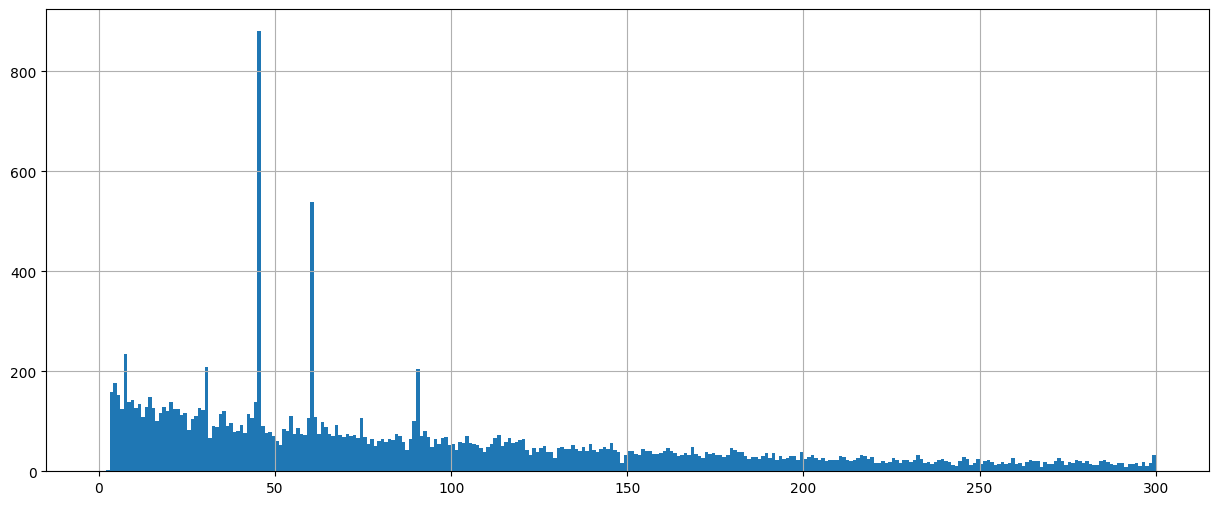

In [24]:
df[df['days_exposition']>-5]['days_exposition'].hist(bins=300, figsize=(15,6),range=(0,300))#, range=(500,1600))
print(df[df['days_exposition']>-5]['days_exposition'].describe())
print(df[df['days_exposition']>-5]['days_exposition'].value_counts(normalize=True))
df[df['days_exposition']>-5].groupby('days_exposition')['days_exposition'].count()

### Вывод

Медианное время продажи 95 дней (3 месяца), Среднее время продажи 180 дней (полгода), 1 квартиль - 1,5 месяца, 3й - ~8 месяцев, типичное время (50 %) продаж от 1,5 до 8 месяцев. Существуют записи со сроком более 4 лет. В первые два дня очень мало продаж (4 из 20518), с третьего дня количество продаж увеличивается до ~160 в день и затем постепенно падает.  Есть "особые" дни: на 45й день продают 4,2% квартир, на 60й - 2,6%, 7 - 1,1%, 30 и 90 - 1%.

## Редкие и выбивающиеся значения.

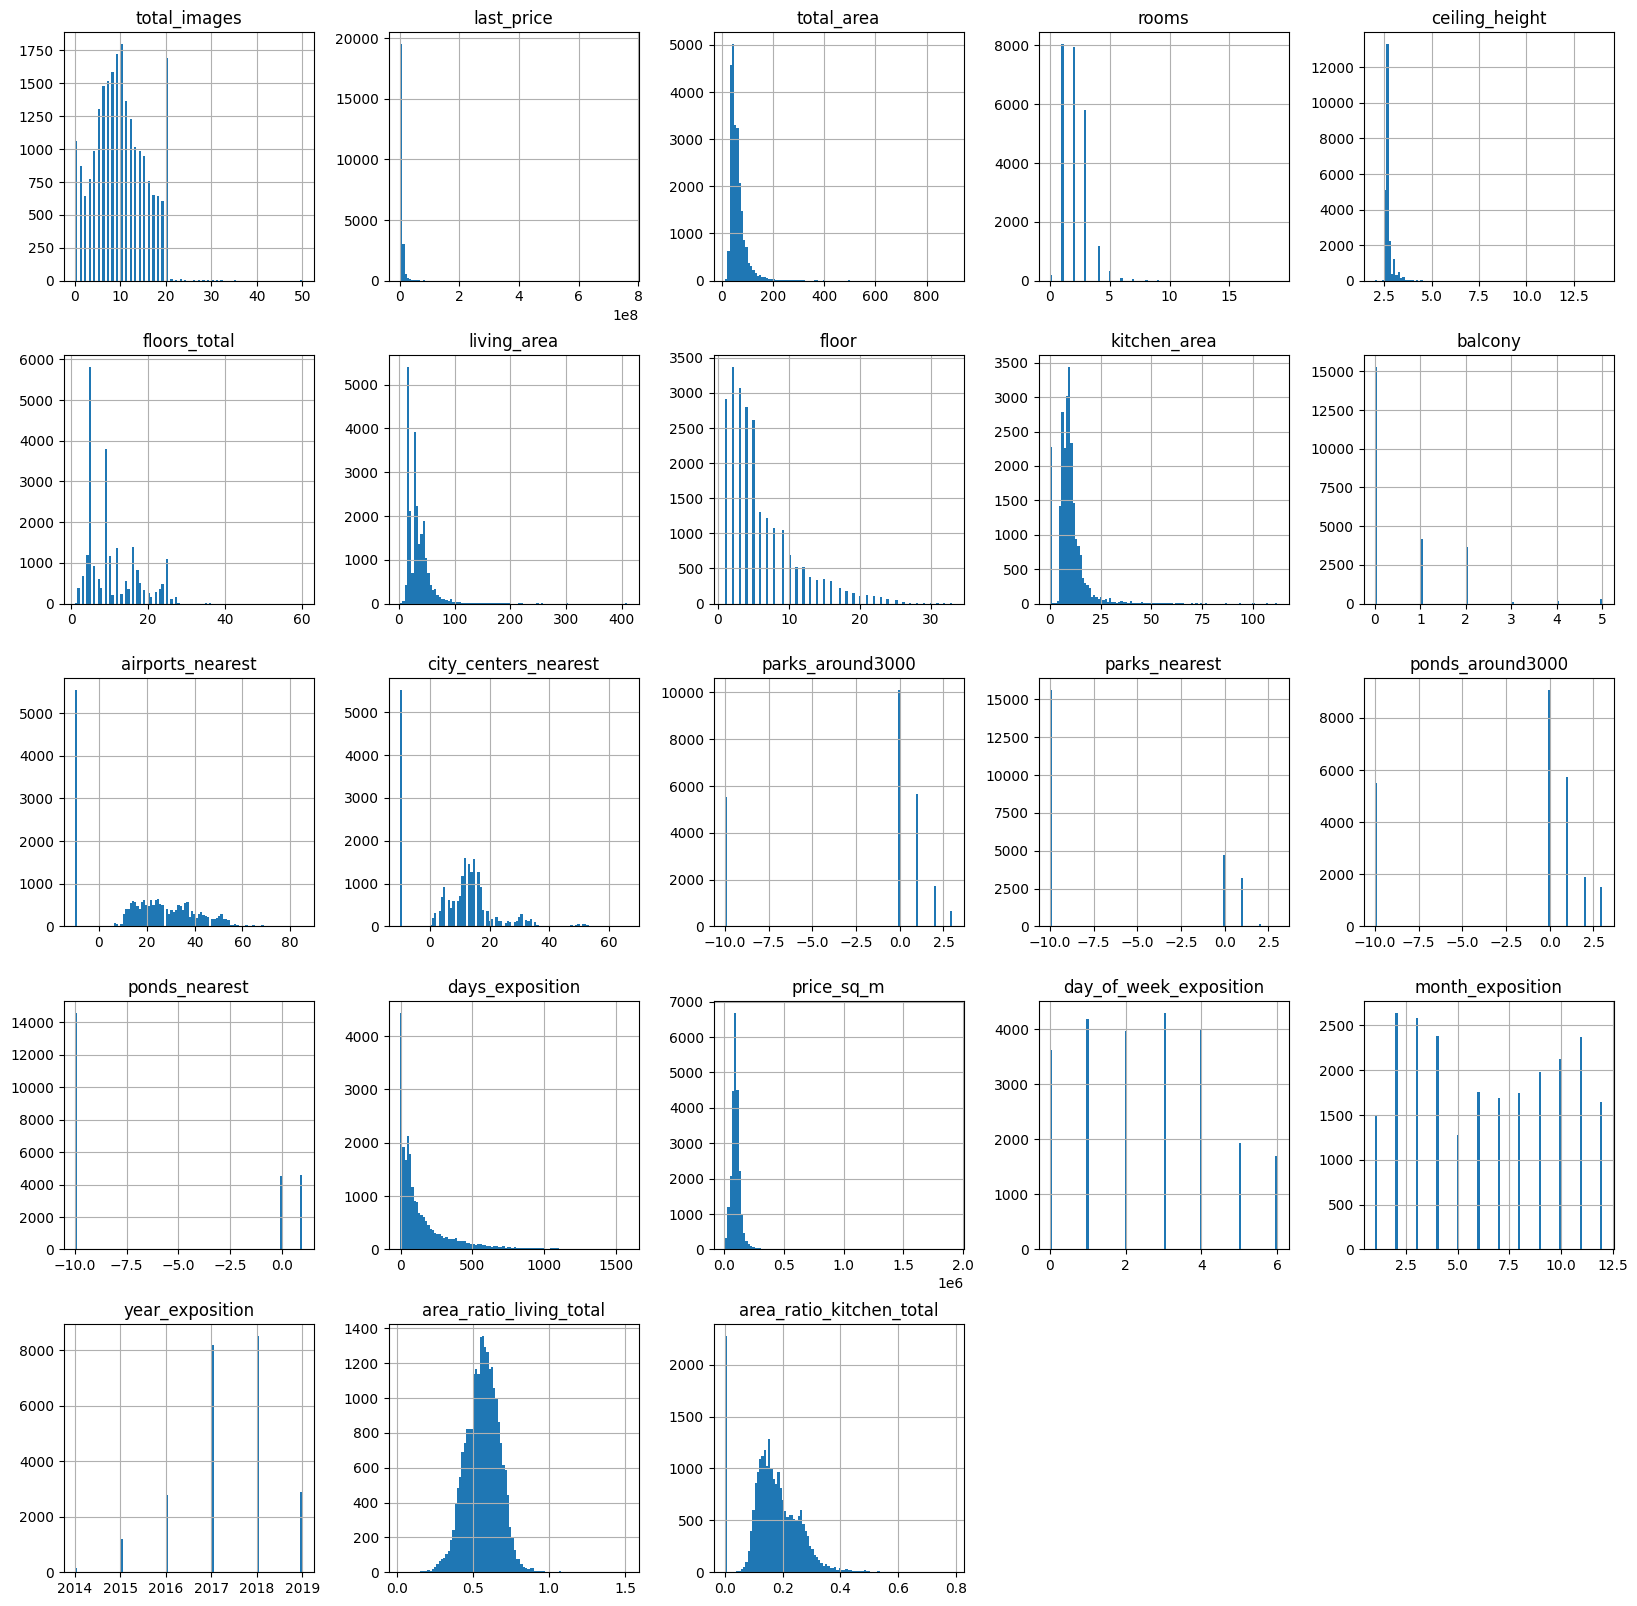

In [25]:
columns_to_hist = (['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 
       'price_sq_m', 'day_of_week_exposition',
       'month_exposition', 'year_exposition', 'floor_type',
       'area_ratio_living_total', 'area_ratio_kitchen_total'])
df[columns_to_hist].hist(bins=100,figsize=(20,20));


В расстояниях и объектах заполненные отриц значения -10, заполненное кол-во дней размещения -5, заполненные нулевая площадь кухни, высоты потолков,  площади

In [26]:
df = df.query('ceiling_height < 100')
#dff = df.query('airports_nearest >= 0 and city_сenters_nearest >= 0 and city_сenters_nearest >= 0')
#dff = dff.query('parks_nearest >= 0 and parks_around3000 >= 0 and ponds_nearest >= 0 and ponds_around3000 >= 0')
#dff = dff.query('days_exposition >= 0 and ~is_restored_ceiling_height and ~is_restored_living_area and kitchen_area > 0')
#df.columns
#dff[columns_to_hist].hist(bins=100,figsize=(20,20))
#dff.info()
#dff=[]

In [27]:
descr = df.describe()

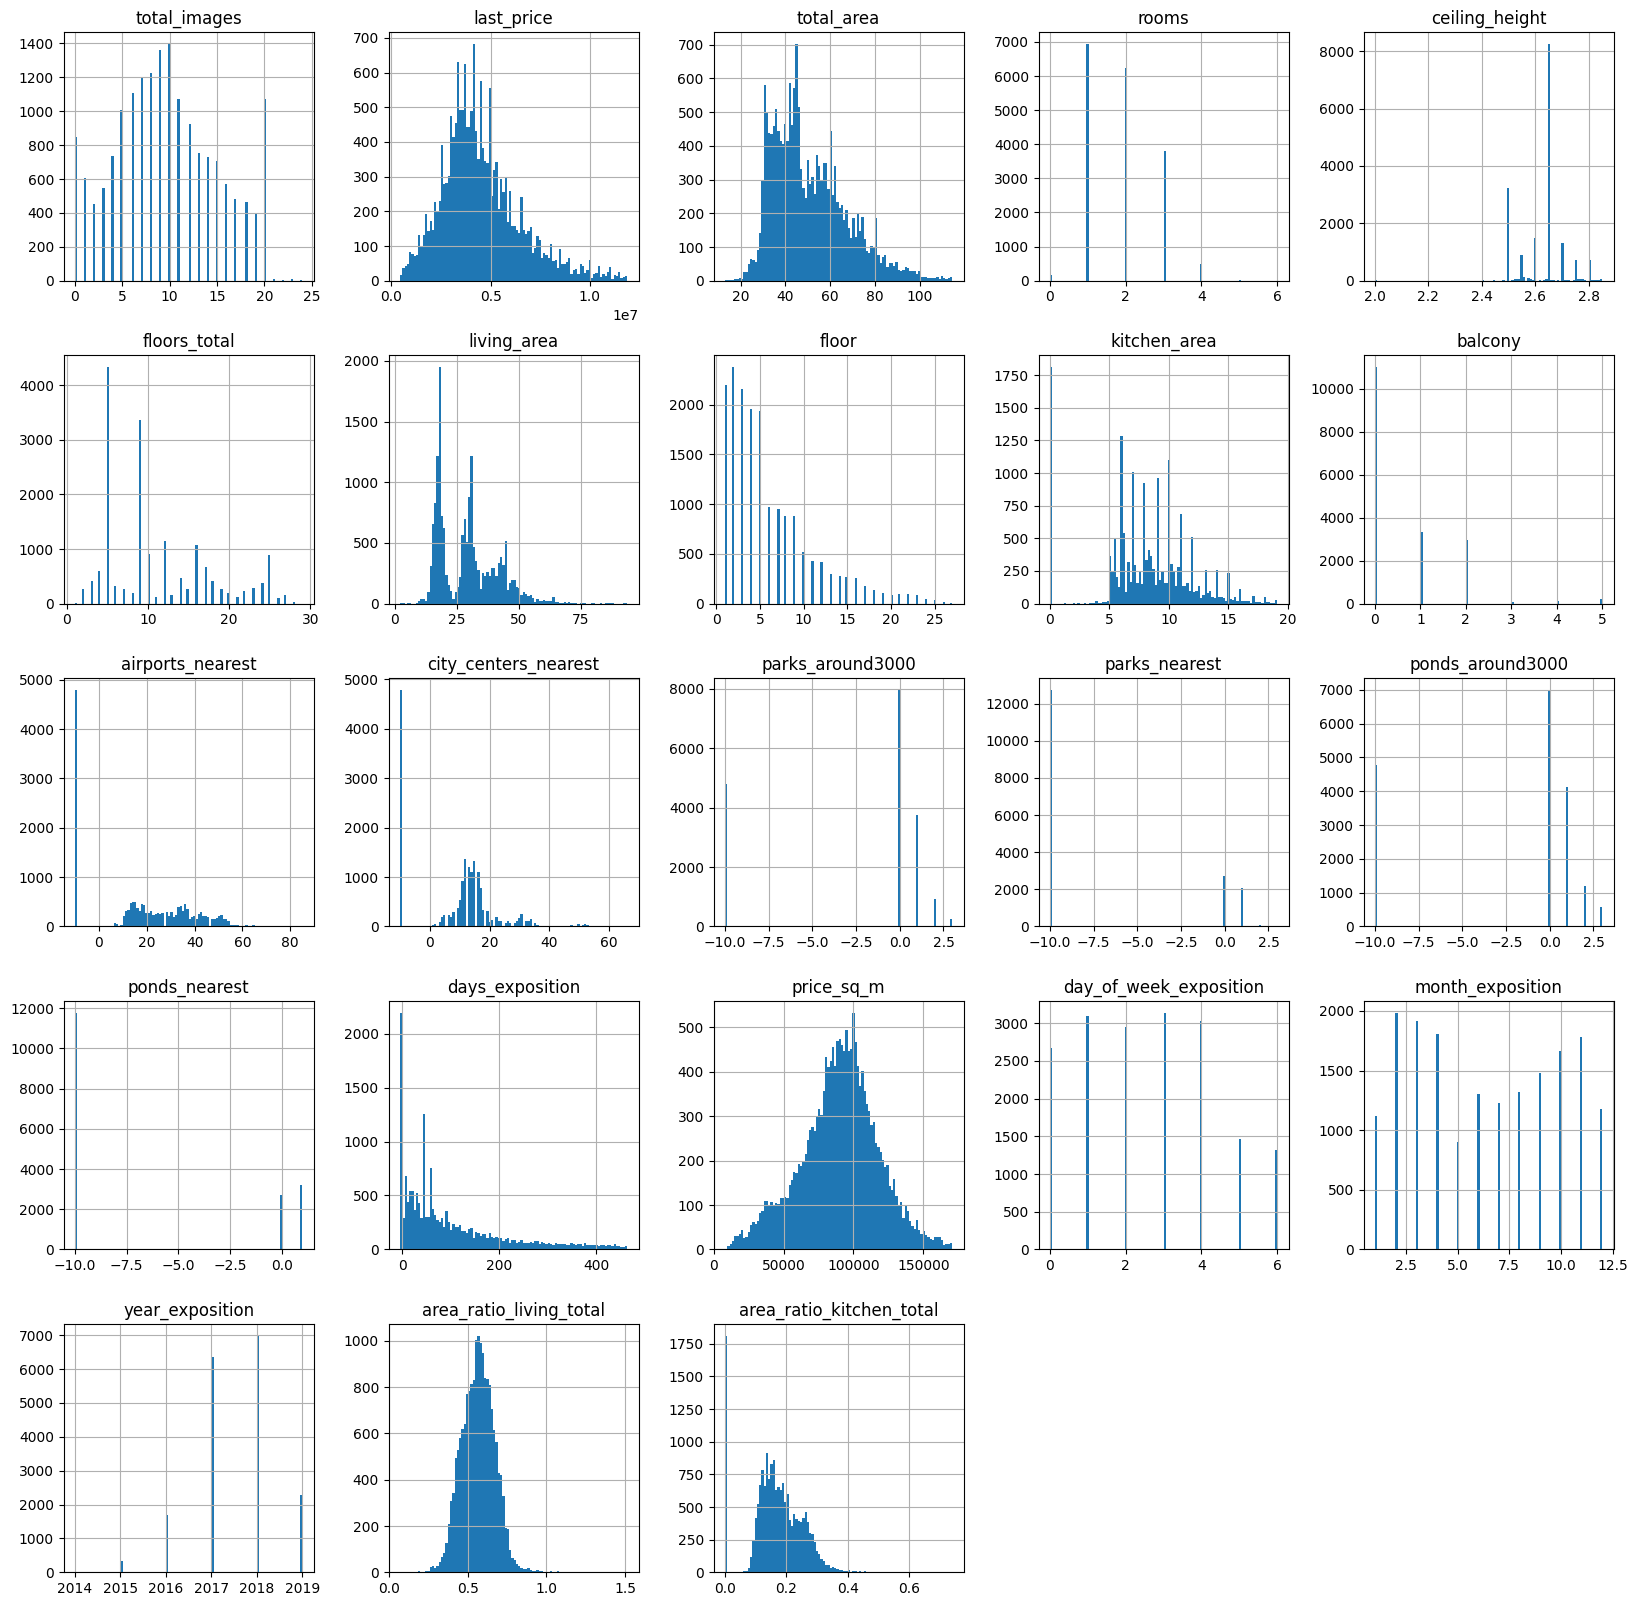

In [28]:
df_full = df
columns_re = ['last_price','total_area','ceiling_height','days_exposition','floors_total','kitchen_area','total_images','price_sq_m']
for i in columns_re:
    df = df[df[i] < (descr.loc['75%',i] + 1.5*(descr.loc['75%',i] - descr.loc['25%',i]))]
df[columns_to_hist].hist(bins=100,figsize=(20,20));

### Вывод

Если убрать все заполненные значения(т.е. если удалять все пропуски), то останется только 2383 объявления. Поэтому необходимо исключать адресно, при анализе зависимостей.

Распределения с длинным хвостом очищены от значений выше Q3 + 1,5IRQ

## Анализ влияния факторов на стоимость квартиры
Изучить, зависит ли цена от цены квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, а также от даты размещения: дня недели, месяца и года

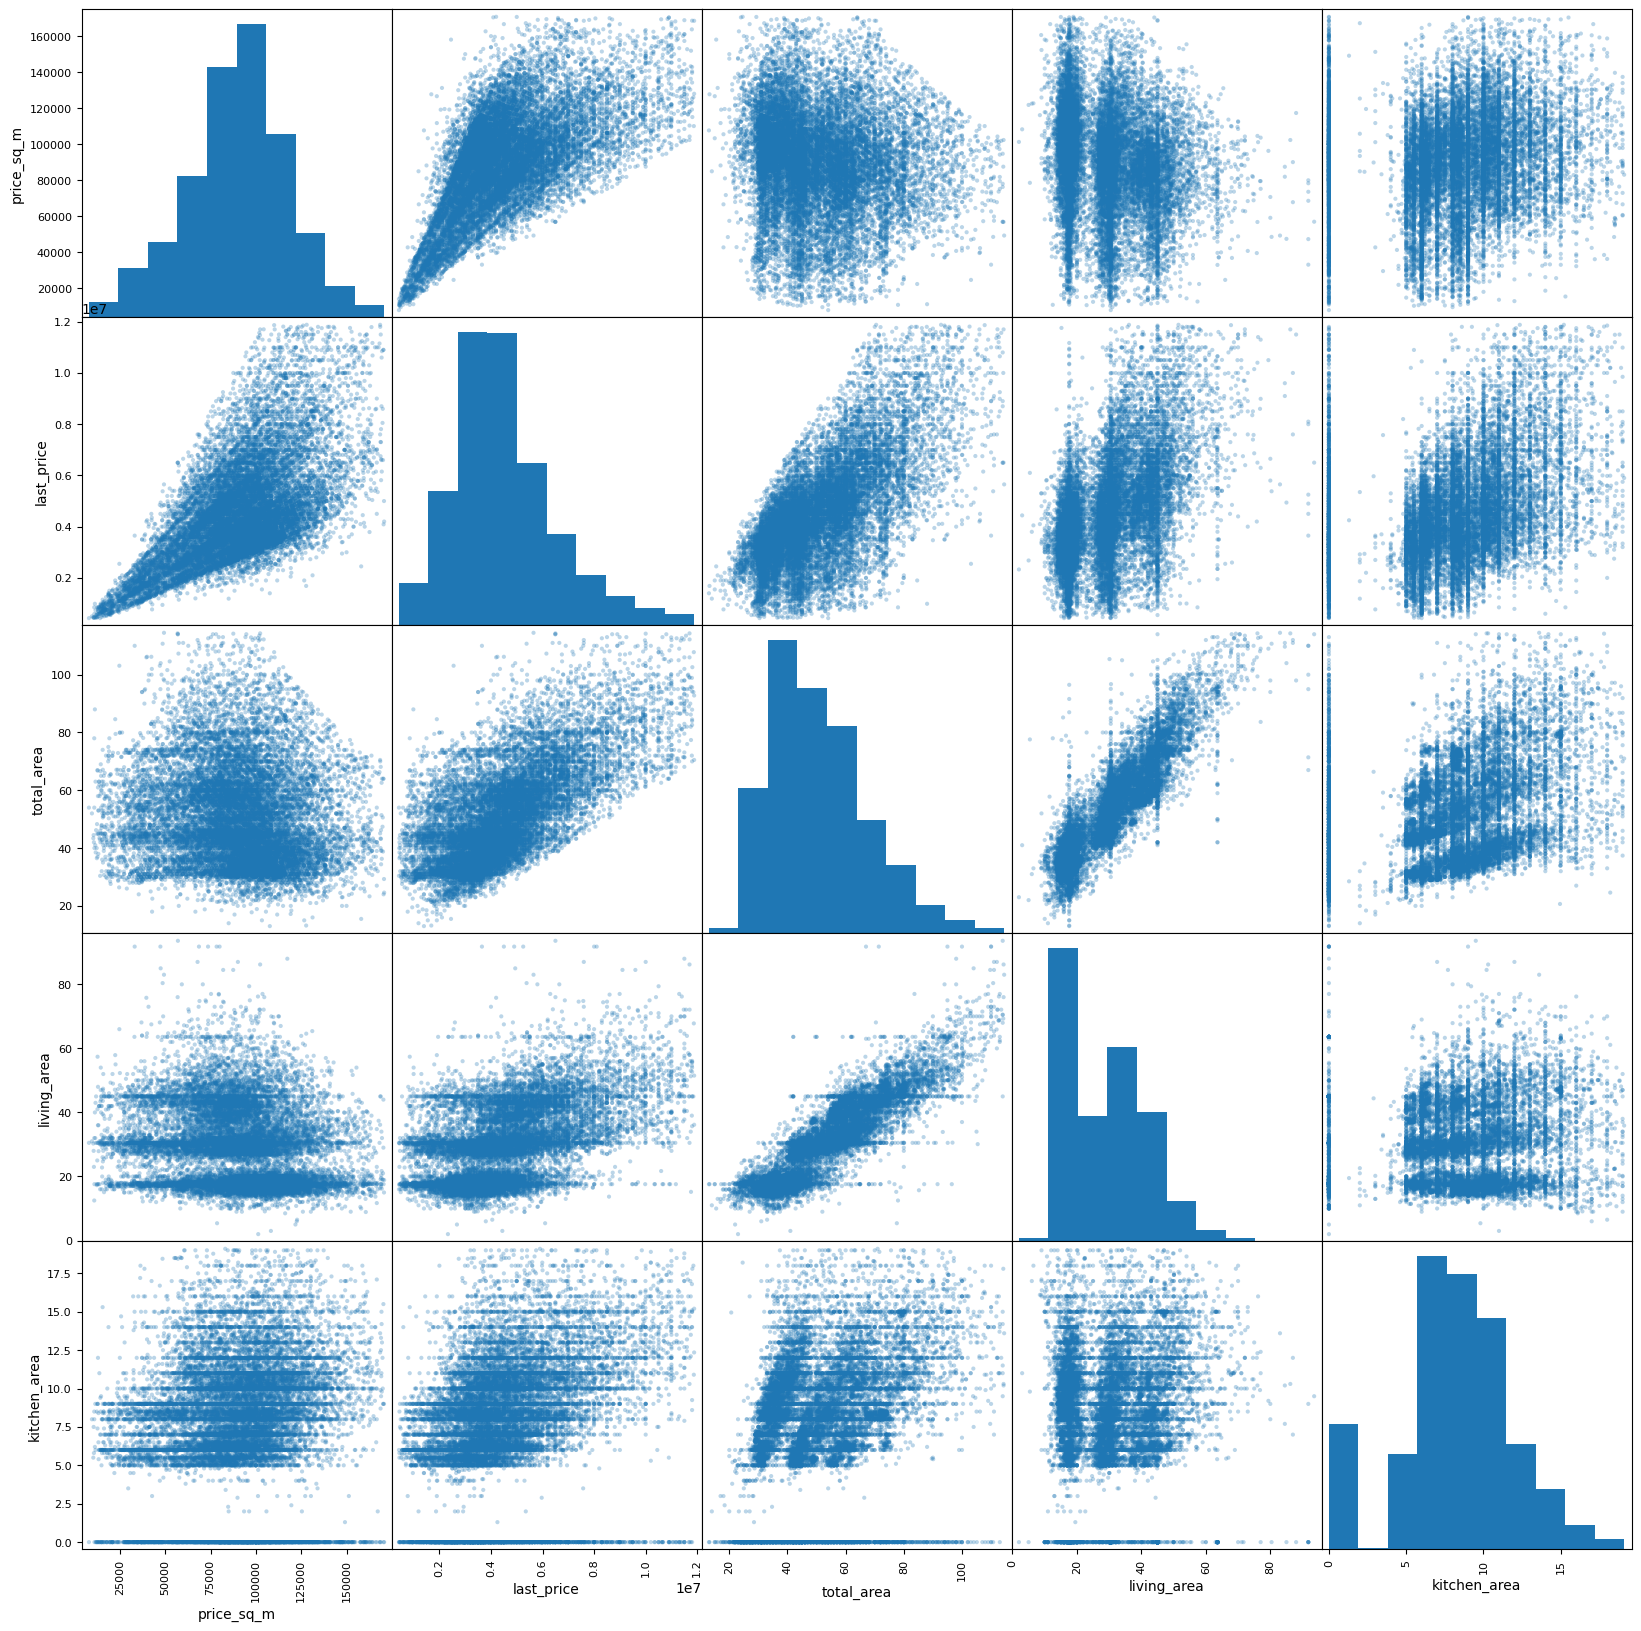

In [29]:
columns_to_scatter=['price_sq_m','last_price','total_area','living_area','kitchen_area']
pd.plotting.scatter_matrix(df[columns_to_scatter], figsize=(20, 20), alpha = 0.3);

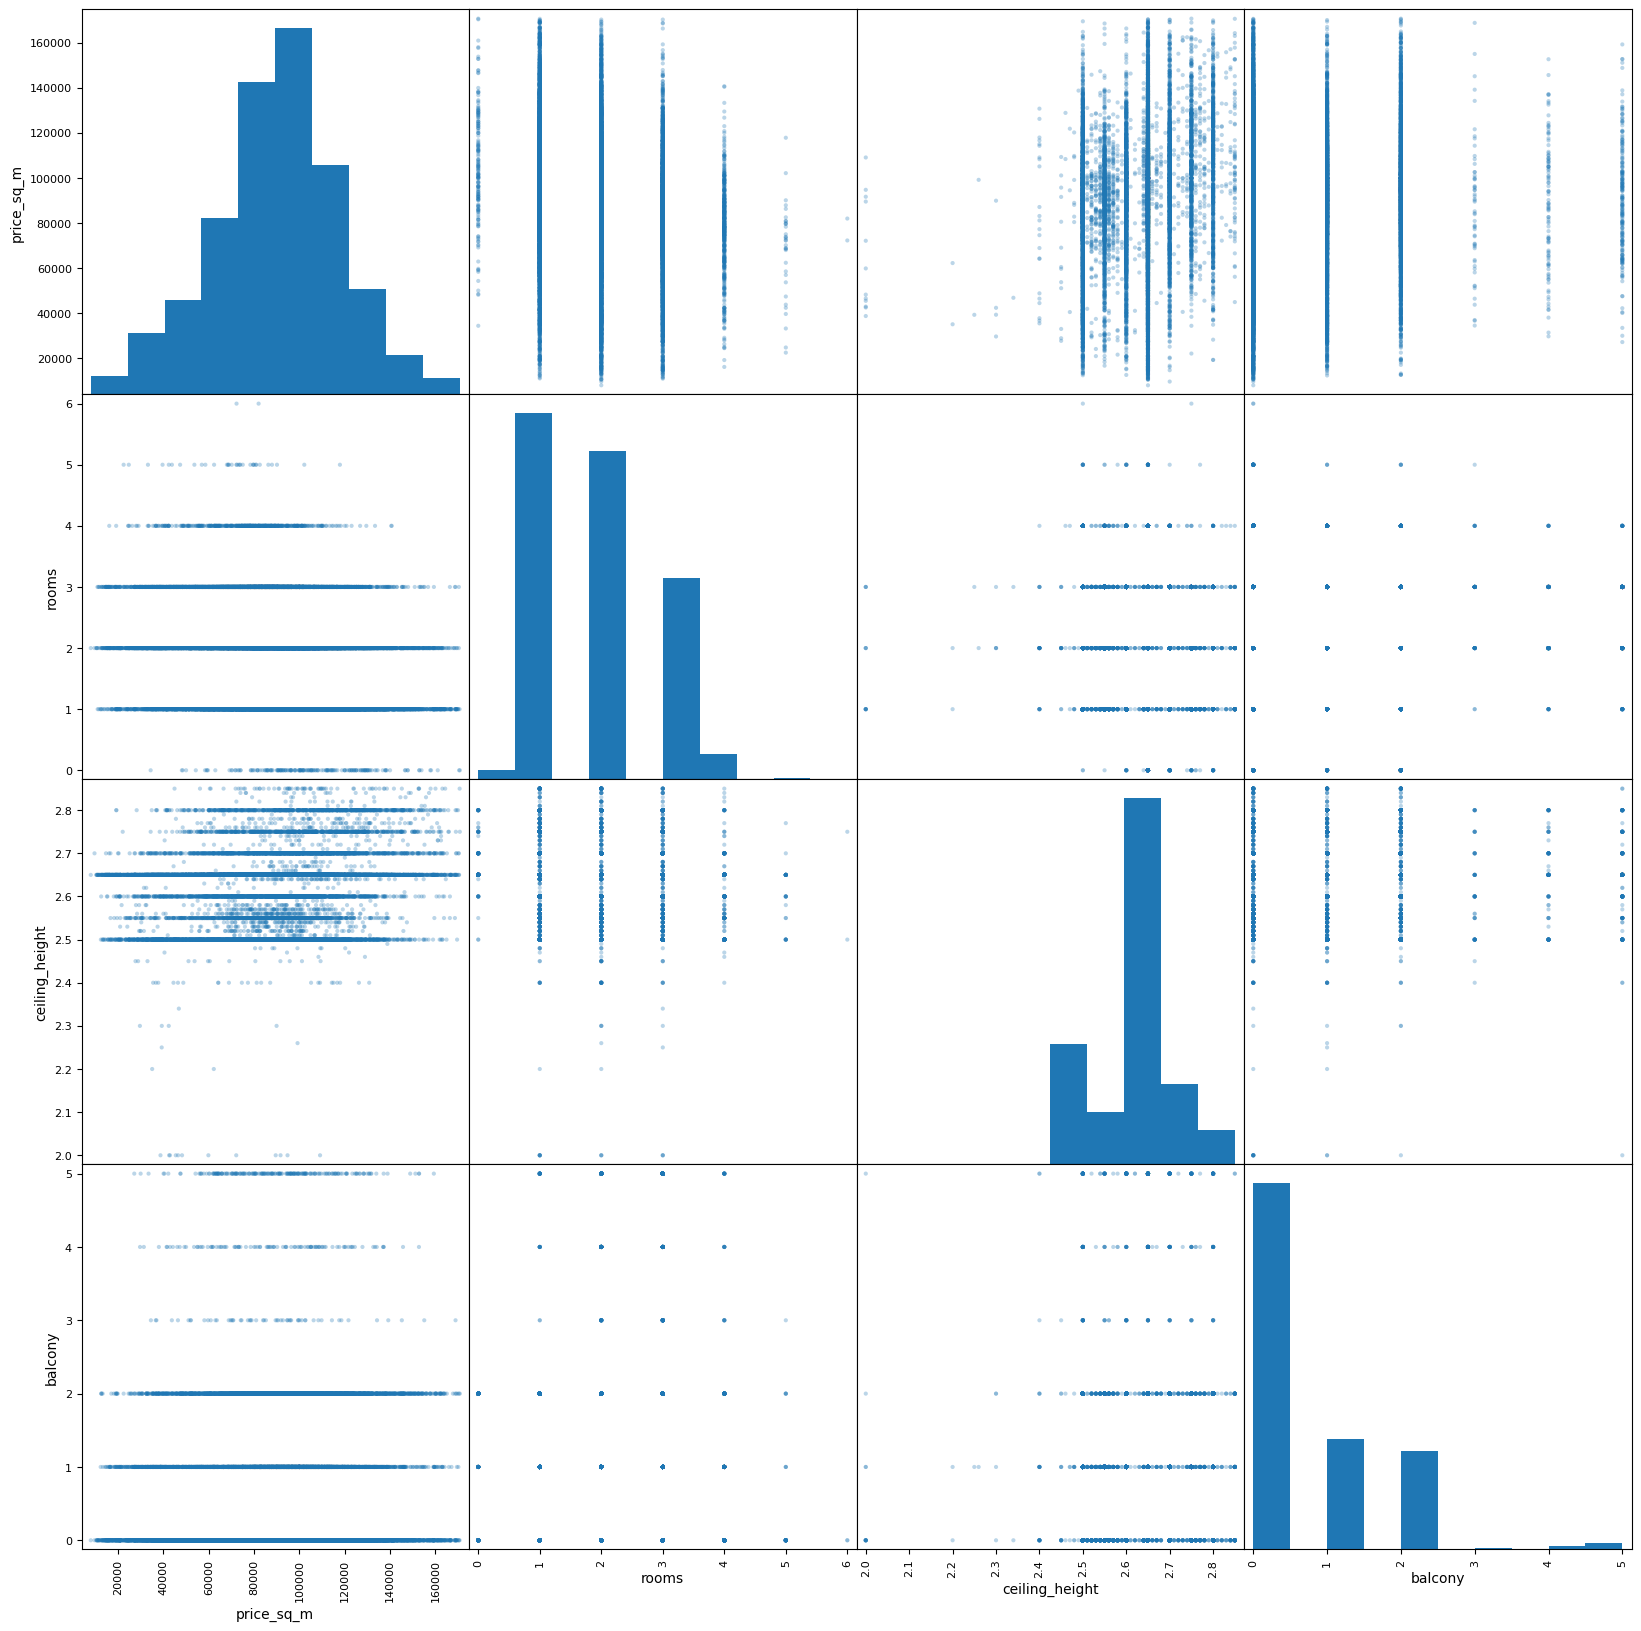

In [30]:
columns_to_scatter = ['price_sq_m', 'rooms', 'ceiling_height', 'balcony']
pd.plotting.scatter_matrix(df[columns_to_scatter], figsize=(20, 20), alpha = 0.3);

floor_type
другой       95000.0
первый       78378.0
последний    82258.0
Name: price_sq_m, dtype: float64

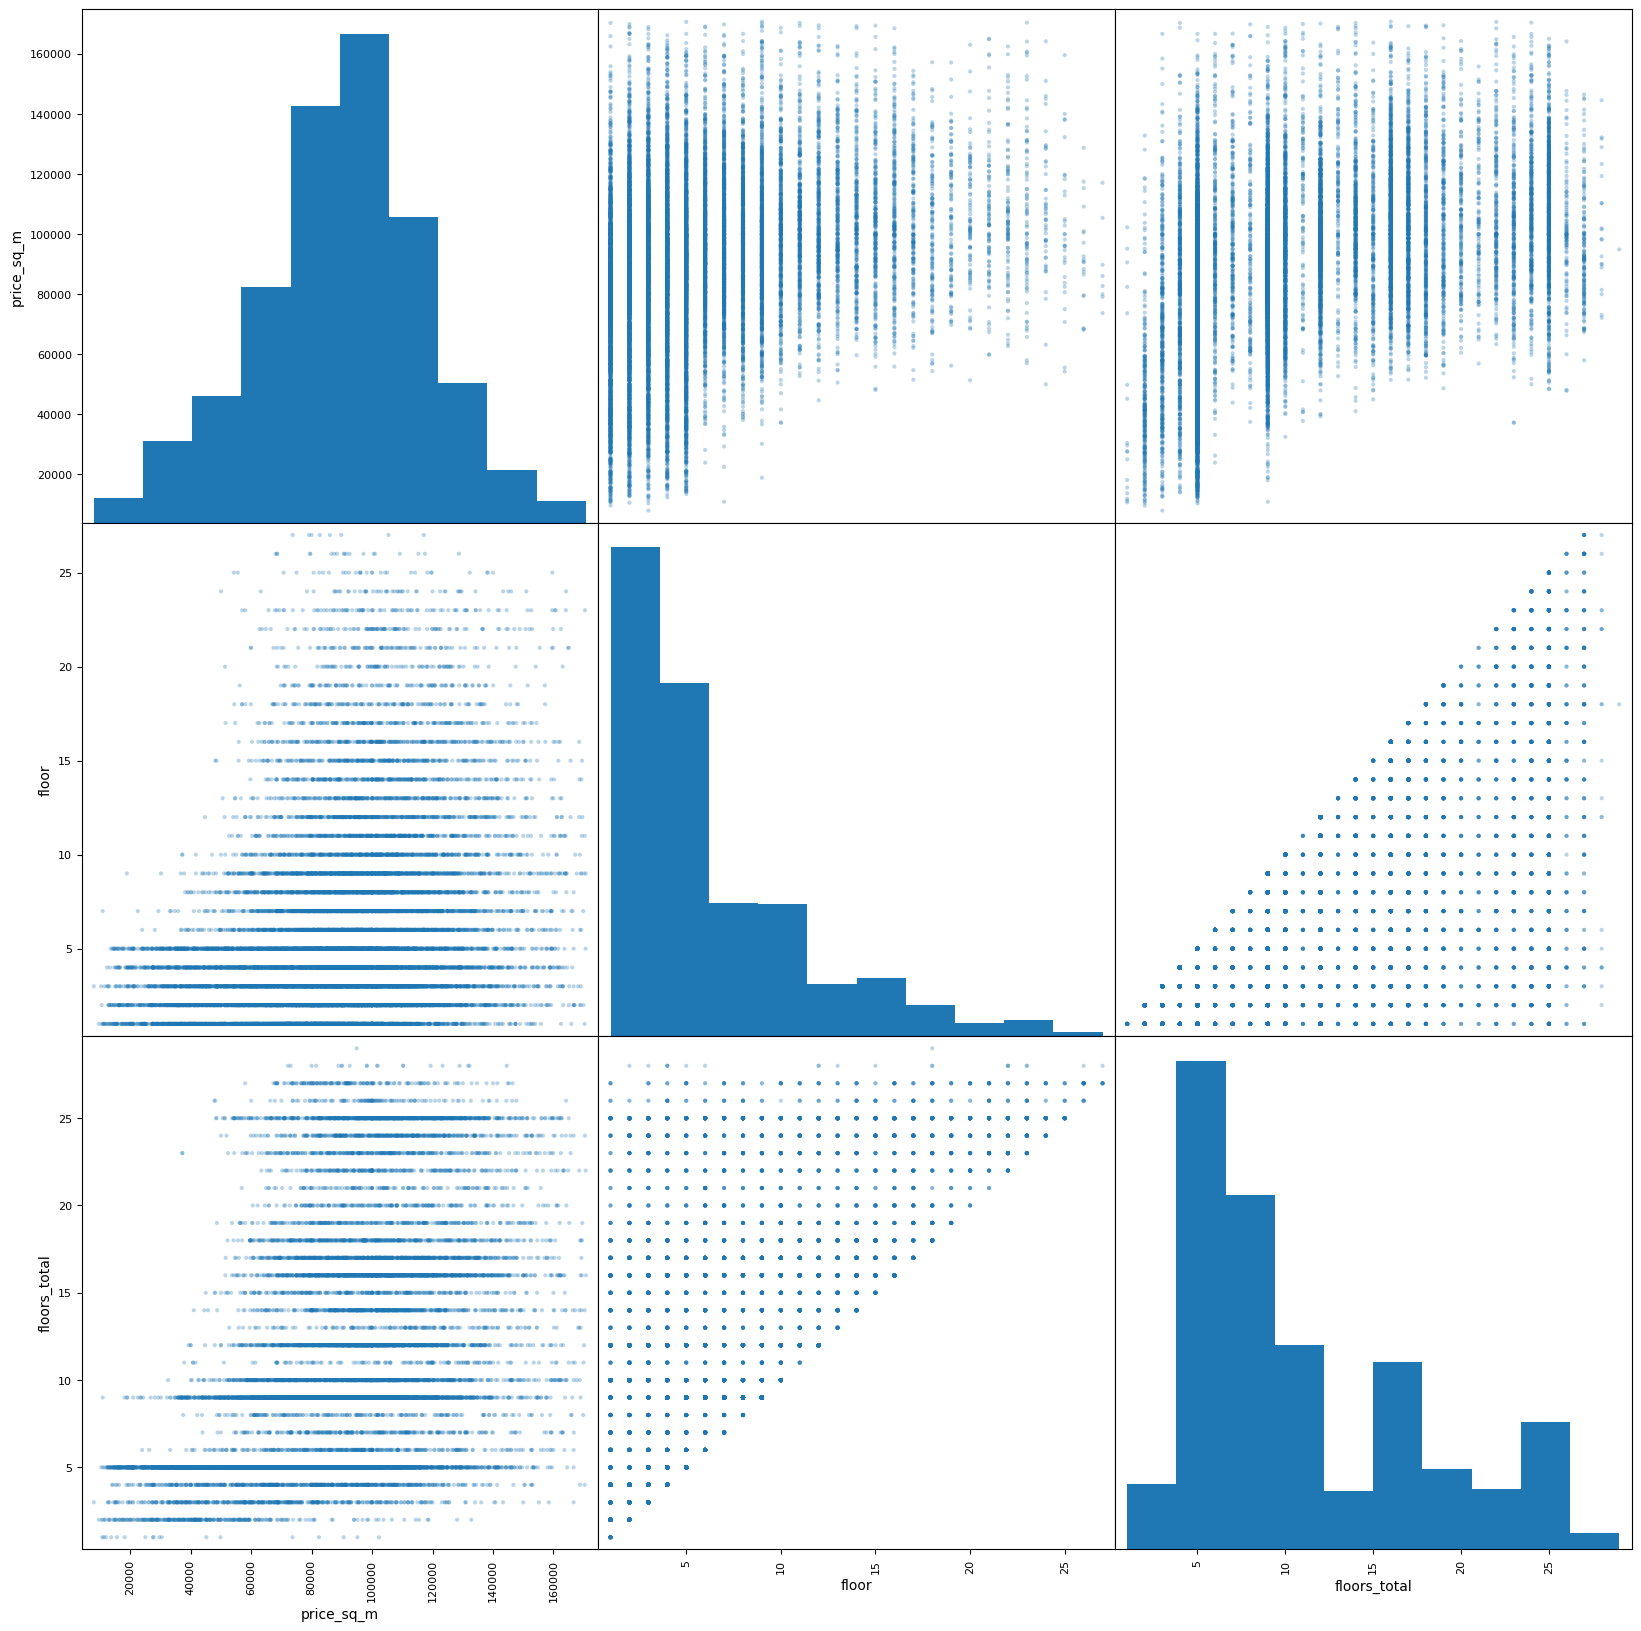

In [31]:
columns_to_scatter = ['price_sq_m', 'floor', 'floors_total', 'floor_type']
pd.plotting.scatter_matrix(df[columns_to_scatter], figsize=(20, 20), alpha = 0.3)
df.groupby('floor_type')['price_sq_m'].median()

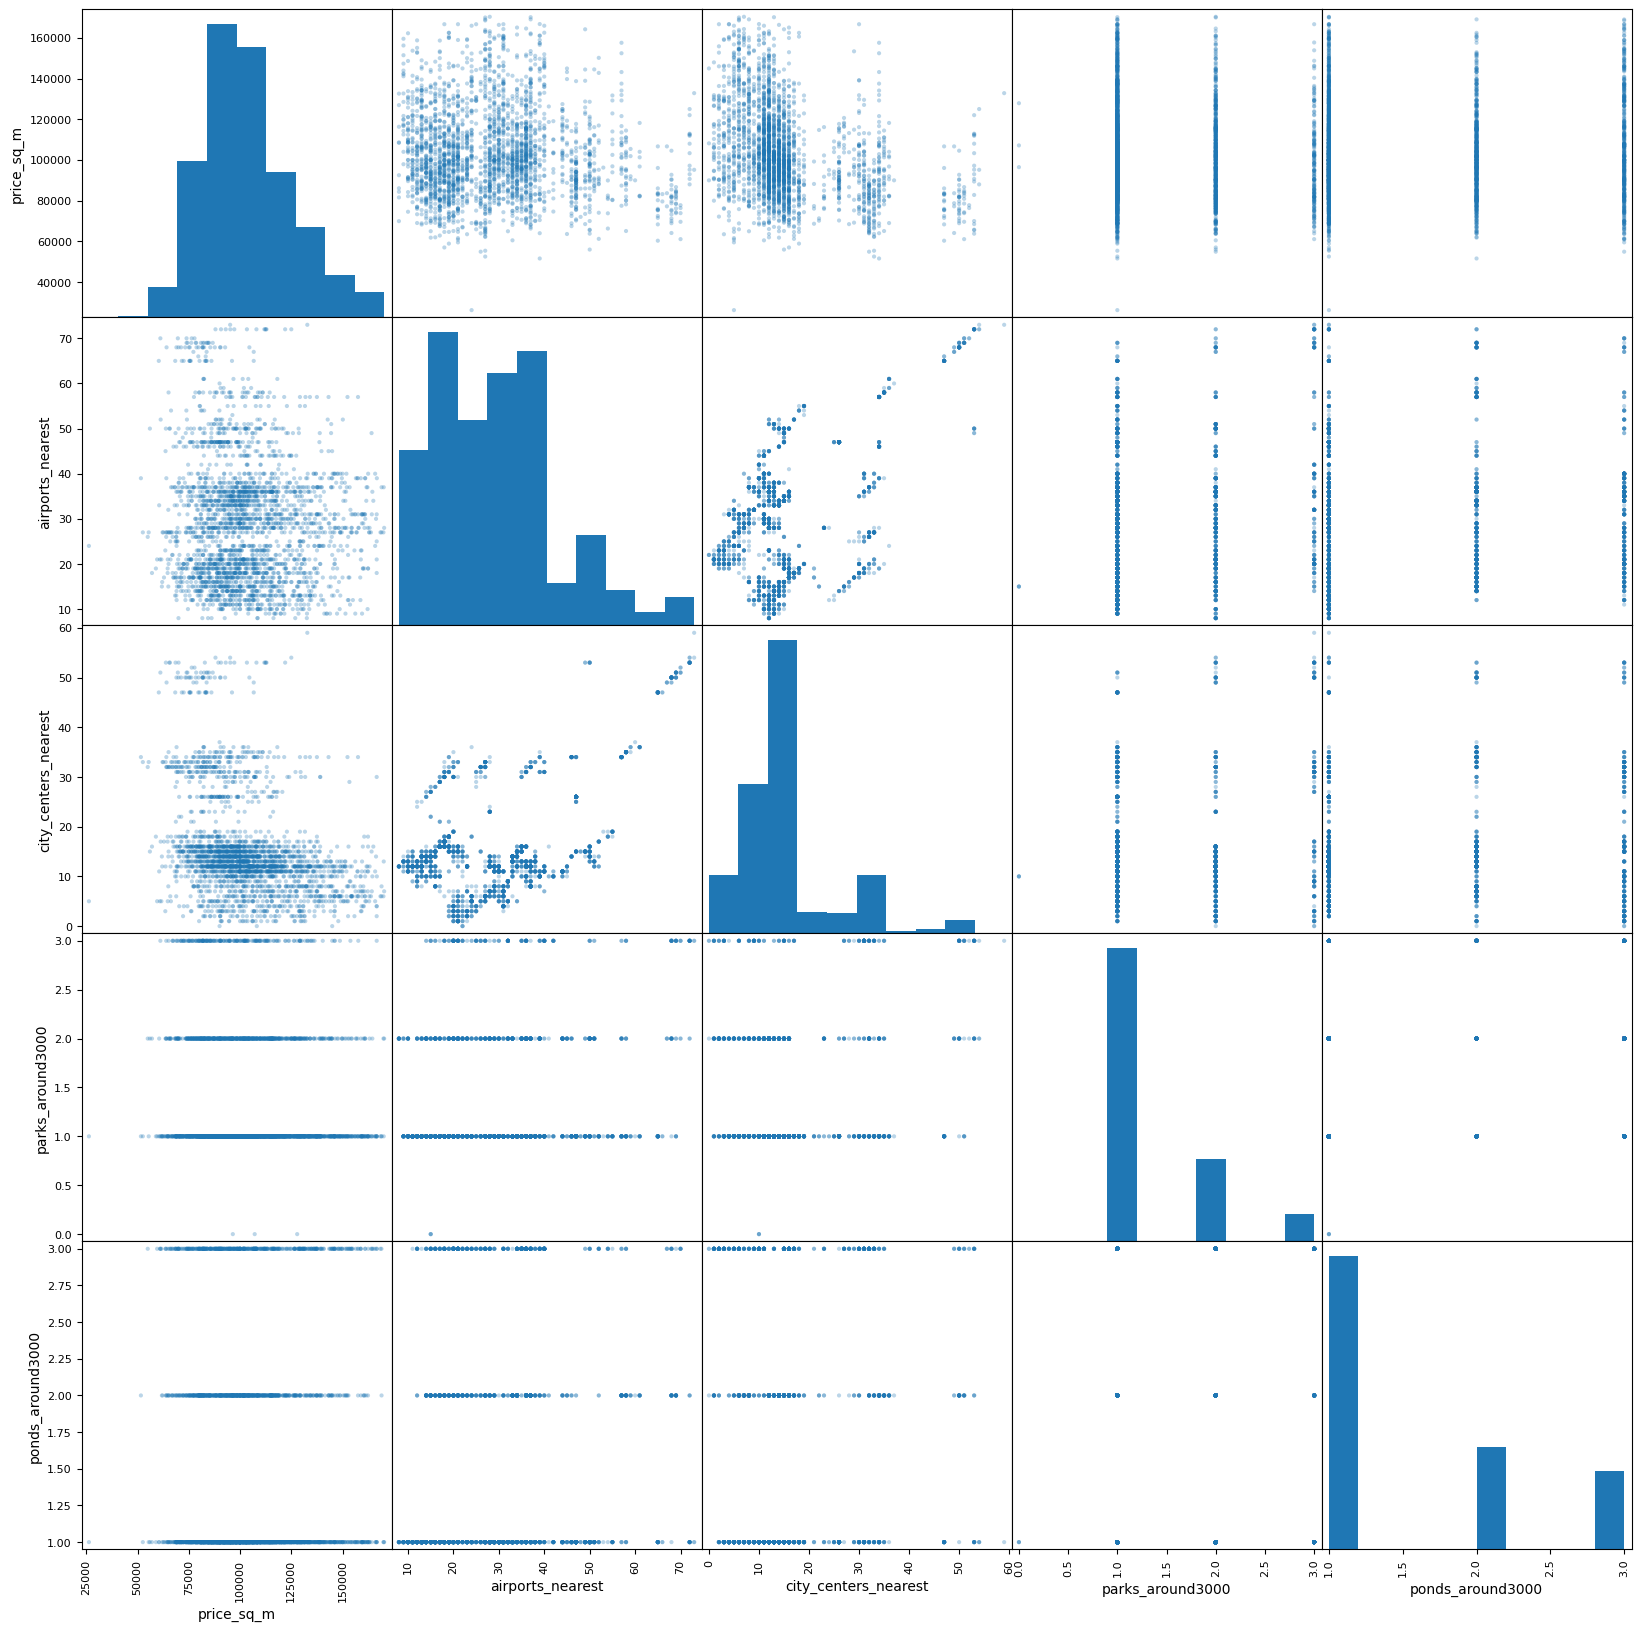

In [32]:
columns_negative = ['airports_nearest','city_сenters_nearest','parks_around3000','parks_nearest', 'ponds_around3000', 'ponds_nearest']   
dff = df
for i in columns_negative:
    dff = dff[dff[i] >= 0] 
#dff = dff[dff['city_сenters_nearest'] <= 4e4] 
columns_to_scatter = ['price_sq_m','airports_nearest','city_сenters_nearest','parks_around3000','ponds_around3000']
pd.plotting.scatter_matrix(dff[columns_to_scatter], figsize=(20, 20), alpha = 0.3);

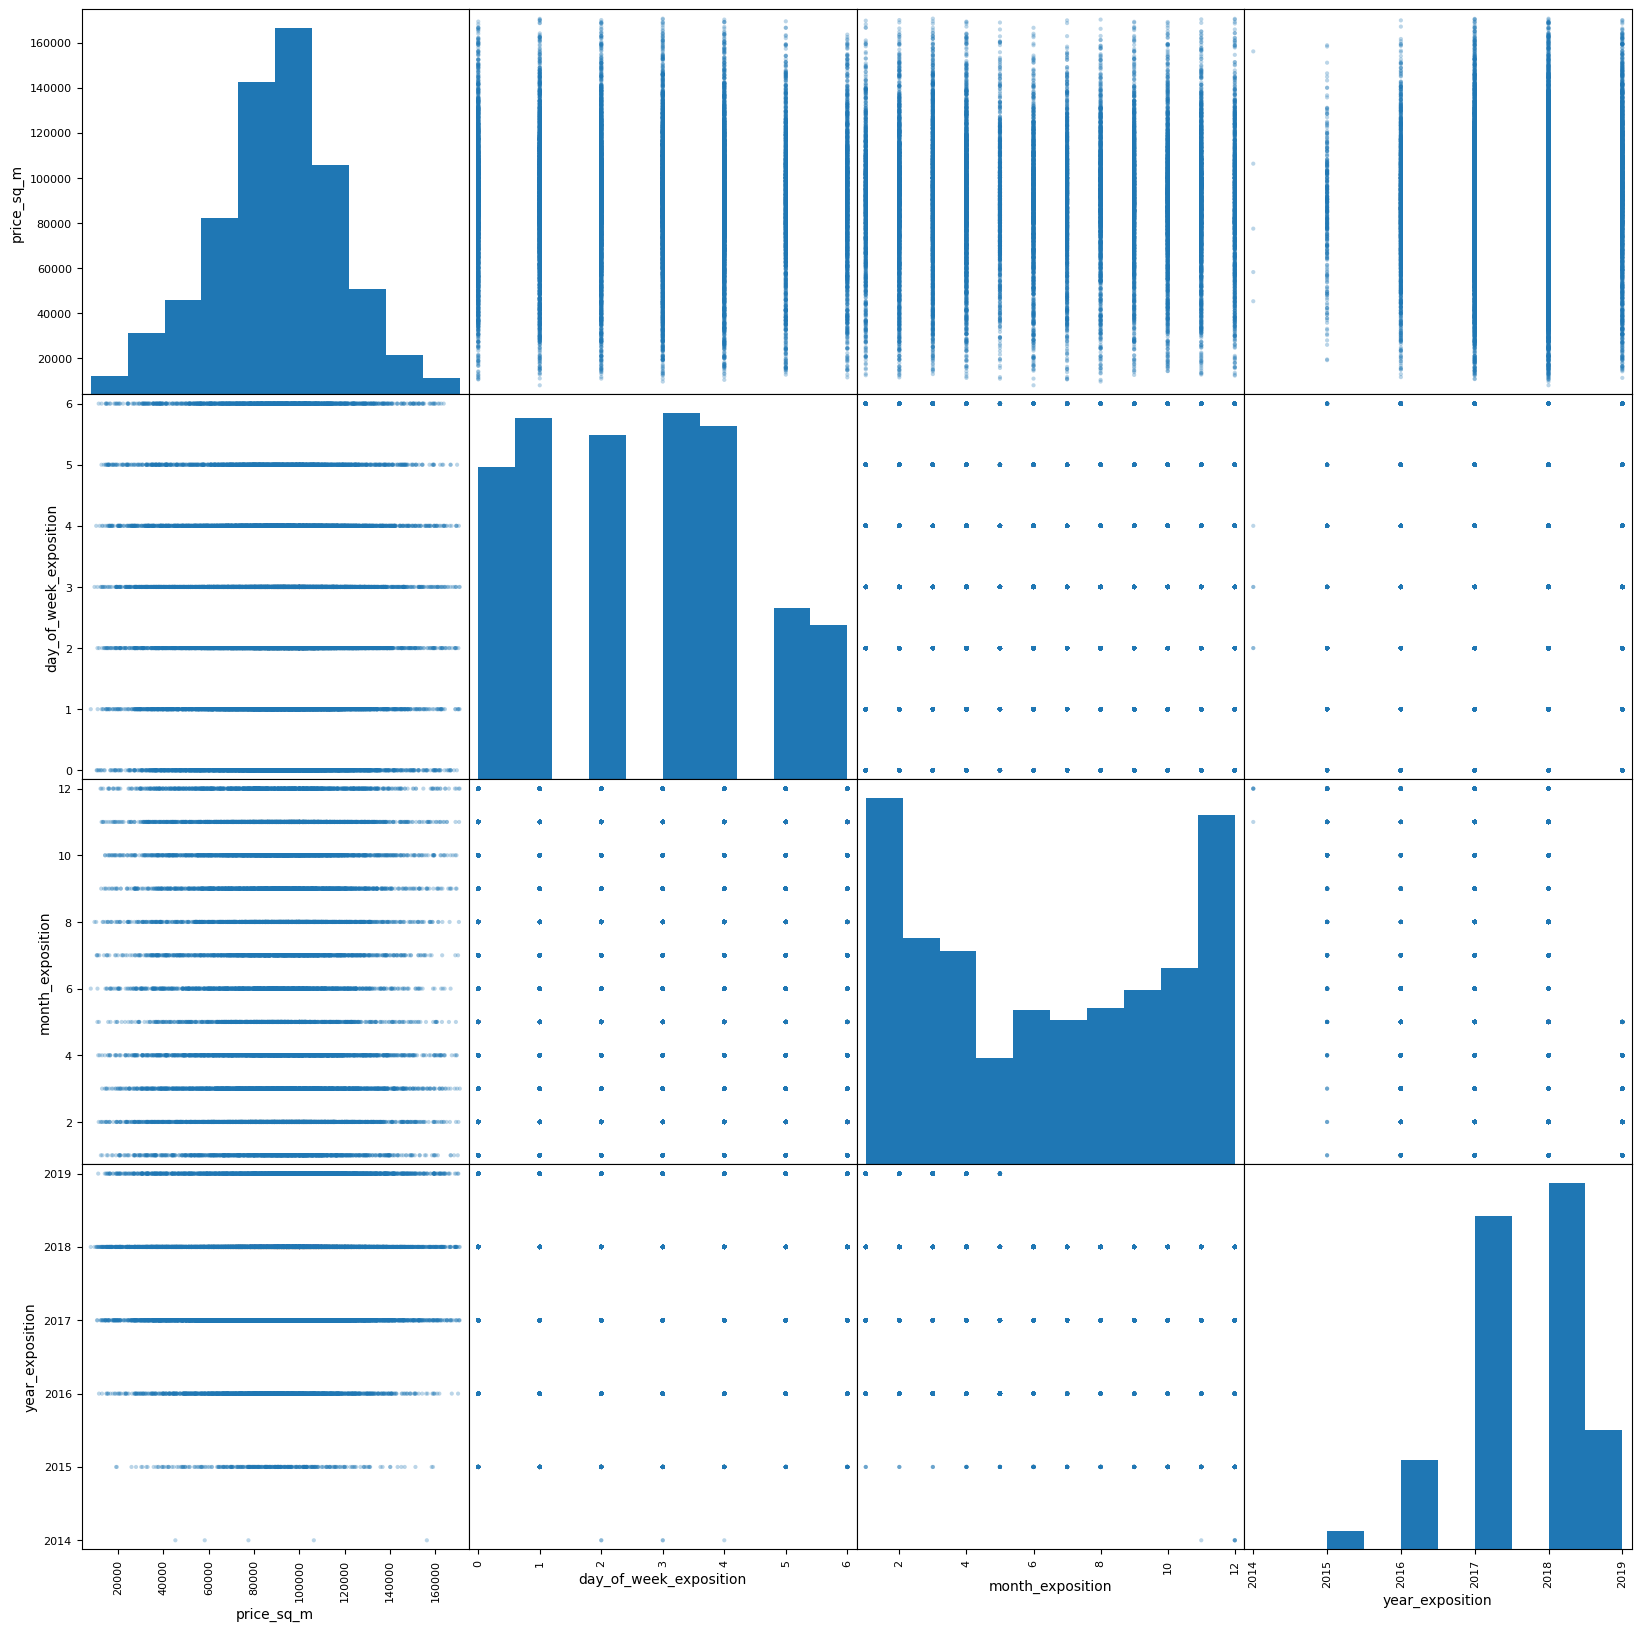

In [33]:
columns_to_scatter = ['price_sq_m','day_of_week_exposition','month_exposition','year_exposition']
pd.plotting.scatter_matrix(df[columns_to_scatter], figsize=(20, 20), alpha = 0.3);

In [34]:
corr_tab = df.corr()['price_sq_m']
corr_tab2 = df.corr()['last_price']

In [35]:
df[['last_price', 'price_sq_m', 'total_area', 'rooms', 'city_сenters_nearest']].corr()


last_price  price_sq_m  total_area     rooms  \
last_price              1.000000    0.627846    0.681533  0.425160   
price_sq_m              0.627846    1.000000   -0.099675 -0.245473   
total_area              0.681533   -0.099675    1.000000  0.807722   
rooms                   0.425160   -0.245473    0.807722  1.000000   
city_сenters_nearest    0.295468    0.394206    0.035761  0.022028   

                      city_сenters_nearest  
last_price                        0.295468  
price_sq_m                        0.394206  
total_area                        0.035761  
rooms                             0.022028  
city_сenters_nearest              1.000000

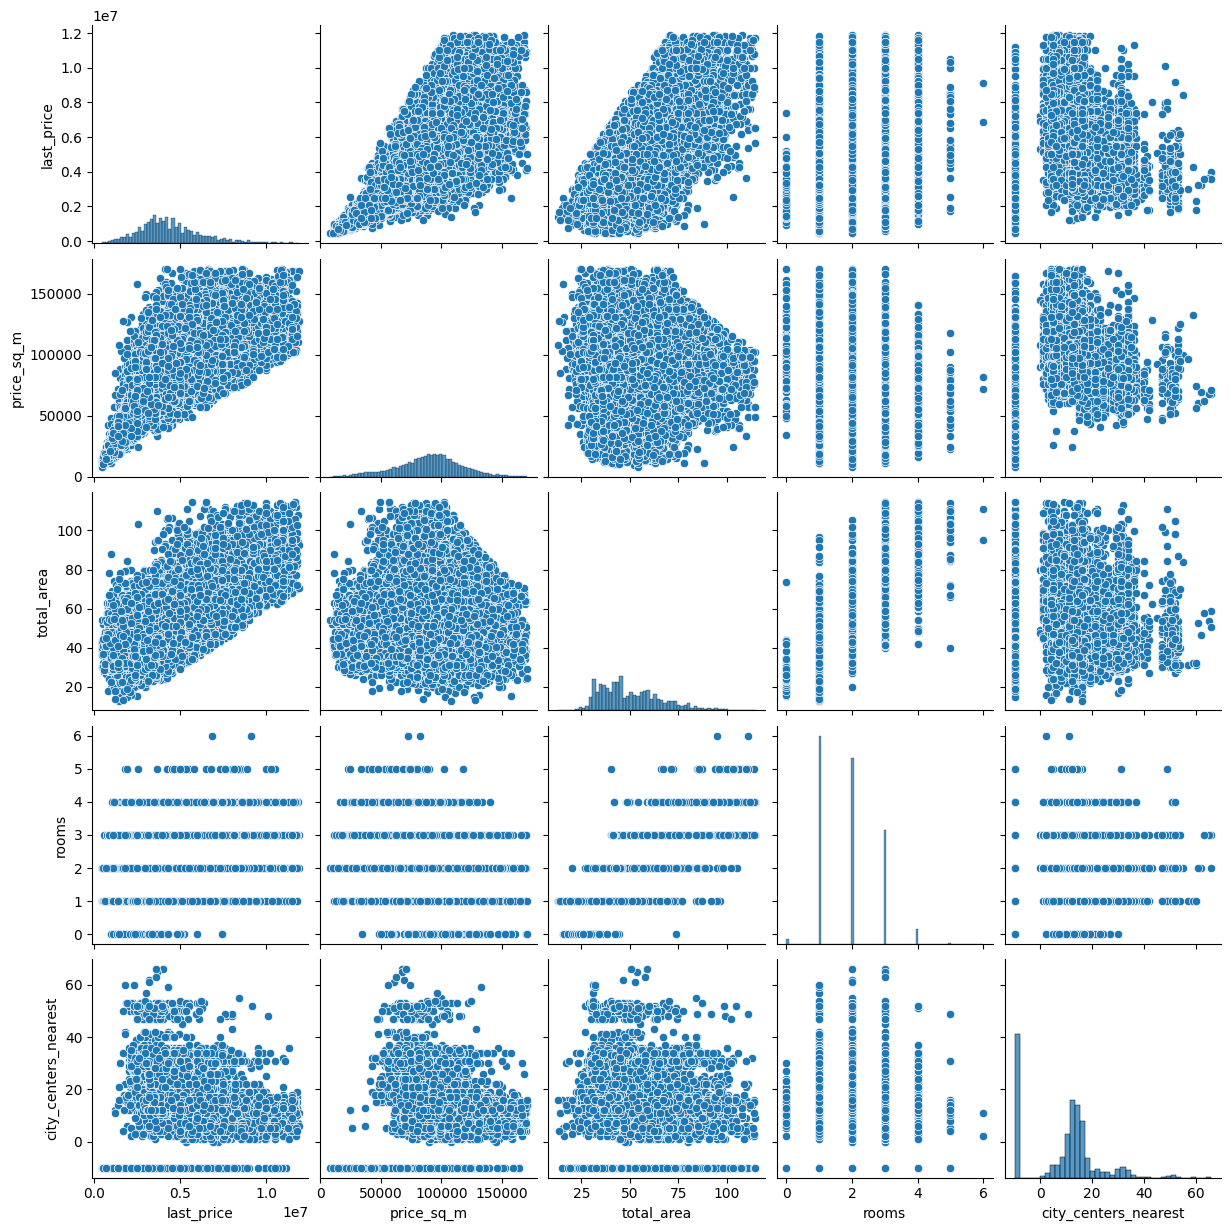

In [36]:
seaborn.pairplot(df[['last_price', 'price_sq_m', 'total_area', 'rooms', 'city_сenters_nearest']])

### Вывод

Цена квартиры зависит:

- от цены за квадратный метр (прямая зависимость 0.63)
- от общей площади (0.68)
- от количества комнат (0.42)
- от расстояния до центра (0.29) аномальный результат: прямая зависимость - чем дальше от центра, тем дороже, возможно из-за новостроек, которые могут быть дороже вторички в центре.




## Топ-10 населённых пунктов по числу объявлений. 
- Посчитайть среднюю цену квадратного метра в этих населённых пунктах. 
- Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 


In [37]:
df_cleaned=df
df = df_full
display(df
      .pivot_table(index='locality_name',values='price_sq_m',aggfunc=['mean','count'])
      .set_axis(['mean','count'], axis='columns', inplace=False)
      .sort_values('mean',ascending=False))
ten_localy_name = df['locality_name'].value_counts().head(10).index
(df
 .query('locality_name in @ten_localy_name')
 .pivot_table(index='locality_name',values='price_sq_m',aggfunc=['mean','median','min','max'])
 .set_axis(['mean','median','min','max'], axis='columns', inplace=False)
 .sort_values('mean',ascending=False))

              

mean  count
locality_name                              
посёлок Лисий Нос      121615.500000      2
Зеленогорск            115122.500000     24
Санкт-Петербург        114761.062020  15769
посёлок Репино         104238.500000      4
Пушкин                 103125.373984    369
...                              ...    ...
поселок Совхозный       12628.500000      2
деревня Выскатка        12335.000000      2
деревня Вахнова Кара    11688.000000      1
посёлок станции Свирь   11481.000000      2
деревня Старополье      11206.000000      3

[364 rows x 2 columns]

mean    median    min      max
locality_name                                             
Санкт-Петербург    114761.062020  104724.0  15345  1907500
Пушкин             103125.373984  100000.0  59836   256521
деревня Кудрово     92473.086957   91860.0  54160   142857
посёлок Парголово   90175.489297   91642.0  39205   138522
посёлок Мурино      85751.733716   85878.0  50000   138580
посёлок Шушары      78676.904545   76876.0  47700   147826
Колпино             75424.150888   74723.5  47957   125000
Гатчина             68745.693811   67796.0  10507   146315
Всеволожск          68654.007538   65789.0  31400   640422
Выборг              58141.489451   58158.0  18750   107473

### Вывод

В 10 населённых пунктах с наибольшим числом объявлений максимальная медианная цена в СПБ (\~104 т.р./м.кв.), минимальная в Выборге (\~58 т.р./м.кв.). Самое дешевое жилье в деревнях и поселках (от \~11 т.р./м.кв.)

## Определение границ центра города
Построить зависимость цены от удаленности от центра

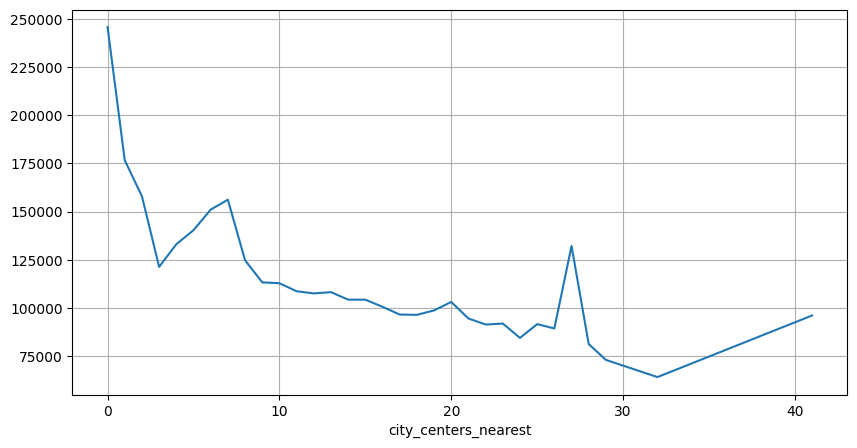

In [38]:
(df
 .query('(locality_name == "Санкт-Петербург" and city_сenters_nearest >= 0)')
 .groupby('city_сenters_nearest')['price_sq_m']
 .mean()
 .plot(figsize=(10, 5), grid=True));




### Вывод

График средней цены становится плавным, начиная с 9-го километра, поэтому центральная зона 9 км

## Анализ факторов для квартир в центре
- Исследовать факторы, влиящие на стоимость квартиры
- Сравнить с данными по всему городу

In [39]:
df_centr = df.query('(locality_name == "Санкт-Петербург" and city_сenters_nearest >= 0 and city_сenters_nearest <= 9)')
df_centr.describe()
print(pd.DataFrame({'All': corr_tab, 'Centr': df_centr.corr()['price_sq_m']}))
df_centr.groupby('floor_type')['price_sq_m'].median()

                                 All     Centr
total_images                0.128815  0.161041
last_price                  0.627846  0.779909
total_area                 -0.099675  0.271620
rooms                      -0.245473  0.032459
ceiling_height              0.187433  0.118975
floors_total                0.419876  0.063937
living_area                -0.195717  0.186977
floor                       0.296368  0.094478
is_apartment                0.006605  0.058156
studio                      0.050993 -0.001297
open_plan                   0.027121  0.008471
kitchen_area                0.160884  0.272500
balcony                     0.052809  0.094320
airports_nearest            0.508774  0.012355
city_сenters_nearest        0.394206 -0.120540
parks_around3000            0.619174  0.149669
parks_nearest               0.288088  0.086496
ponds_around3000            0.616406  0.182043
ponds_nearest               0.286421  0.116662
days_exposition            -0.050879  0.006778
is_restored_c

floor_type
другой       124074.0
первый       105236.0
последний    114655.0
Name: price_sq_m, dtype: float64

In [40]:
columns_with_linear_corr = ['last_price', 'price_sq_m', 'total_area', 'rooms',
                            'ceiling_height', 'living_area','kitchen_area',
                            'airports_nearest', 'city_сenters_nearest']

corr_tab2 =df_cleaned[columns_with_linear_corr].corr()['last_price']

df_centr = df_cleaned.query('(locality_name == "Санкт-Петербург" and city_сenters_nearest >= 0 and city_сenters_nearest <= 9)')
df_centr.describe()
print(pd.DataFrame({'All': corr_tab2, 'Centr': df_centr[columns_with_linear_corr].corr()['last_price']}))
print('Центр:', df_centr.groupby('floor_type')['price_sq_m'].median())
print('Все:',df_cleaned.groupby('floor_type')['price_sq_m'].median())


                           All     Centr
last_price            1.000000  1.000000
price_sq_m            0.627846  0.339657
total_area            0.681533  0.808974
rooms                 0.425160  0.527361
ceiling_height        0.223875  0.261010
living_area           0.530770  0.648815
kitchen_area          0.361125  0.371100
airports_nearest      0.406633 -0.145102
city_сenters_nearest  0.295468 -0.322192
Центр: floor_type
другой       113452.0
первый       100977.0
последний    105673.0
Name: price_sq_m, dtype: float64
Все: floor_type
другой       95000.0
первый       78378.0
последний    82258.0
Name: price_sq_m, dtype: float64


### Вывод 
В центре цена за квартиру **зависит**: 
- от цены за квадратный метр (прямая зависимость, в центре зависимость значительно меньше, чем для всех квартир)
- высоты потолков (слабая прямая зависимость)
- от площади (общей, кухни и жилой - прямая)
- от числа комнат
- от типа этажа (медианы: первый этаж самый дешевый 101 т.р./м кв, потом последний 106 т.р./м кв, потом промежуточный 113 т.р./м кв)

Отличие квартир в центре от всех квартир в появлении слабой обратной зависимости цены от расстояния до центра. 


# Общий вывод

**1. Изучены данные из файла**

В таблице 23699 записей по 22 параметра, в 14 столбцах присутствуют пропуски, 14 столбцов вещественных значений. Название столбца cityCenters_nearest было не в змеином регистре, заменено на city_сenters_nearest.Изучено описание данных.

**2. Предобработка данных**

2.1. Составлен план предобработки

2.2. Проанализированы и заполнены пропуски в данных.

2.2.1. Примерно в трети объявлений пропущена высота, пропущенные значения восстановлены медианным значением. В записях присутсвовали записи с аномальными высотами, которые можно скорректировать: высоты в диапазоне 1-1,75 м увеличены на 1 м; высоты 20-32 м уменьшены в 10 раз, так как вероятно допущена опечатка в месте постановки разделителя дробной части.

2.2.2. Из 86 записей с пропусками в СПБ - 70, 16 - "пригороды", этажы в пригородах от 1 до 21-го, т.е. не ниже, чем в СПБ. Вариант восстановления: квартира на 1-5 этаже - пятиэтажка, 6-9 -- 9-этажка, 10-12 -- 12этажка, 13-16 -- 16этажка, 17-21 -- 25 этажка. Так как распределение этажности мультимодальное с модами в данных этажностях. Восстановление слабо повлияет на итоговые зависимости из-за малого количества пропусков. При такой замене процент последних этажей 17,8% среди пропусков, а в исходном списке процент последних этажей 14,2%.

2.2.3. 8% объявлений с пропущенной жилой площадью, пропущенные значения восстановил медианными значениями жилой площади для квартир с таким же количеством комнат. Нужно проверить влияние на итоговый результат, для этого добавил логический столбец восстановлена ли площадь. В непустых значениях присутствуют маленькие величины в несколько м кв, возможно продажа долей квартир/комнат, либо некорректные данные.

2.2.4. 90% объявлений с пропущенными занчениями "аппартаменты". В изначально заполненных данных 1,8% объявлений аппартаменты. В итоговых зависимостях позиция не исследуется, поэтому заменяю пропуски на "не аппартаменты", после заполнения пропусков аппартаментов всего 0,2%, можно удалить столбец.

2.2.5. Пропуски в площади кухни заполнены 0

2.2.6. Пропуски в количестве балконов заполнены 0

2.2.7. Из 49 пропусков 41 имеют расстояния до центра и аэропорта, медианные значения этих расстояний (24 км и 11 км) для СПБ и для этих 41 строки примерно равны, для пригородов медианные значения больше. Но максимальные значения расстояний с пропусками больше максимальных расстояний объявлений из СПБ. Кроме того, медианное значение населенного пункта - СПБ. Восстанавливаю все пропуски значением СПБ, в том числе 8 строк без расстояний.

2.2.8. Примерно 5500 записей с пропусками одновременно в столбцах расстояний до аэропорта и центра, кол-ва парков и водоемов. airports_nearest 5542 city_сenters_nearest 5519 parks_around3000 5518 ponds_around3000 5518 Записи с пропущенными расстояниями, получены в основном для "пригородов" СПБ. Вероятно пропуски обусловлены особенностями автоматического определения расстояний на основе картографических данных. Возможно не указан адрес или ошибка в адресе, поэтому не могут быть определены расстояния.
Пропуски в ячейках заполнены заметными выбивающимися значениями -10000 (расстояния) и -10 (количество).

2.2.9. Расстояния до парков и водоемов пропущено у примерно 15 тыс объявлений (60%). В 11тыс объявлений отсутствуют обе позиции, и по 4 тыс строк с пропусками либо первого, либо второго. Отсутсвует расстояние до парка в строках с нулевым количеством парков (10 тыс) или с пропуском количества парков (5.5 тыс). Если парков поблизости нет, то расстояние до него можно заполнить заметным выбивающимся числом -10000. Аналогичная ситуация с водоемами: Отсутсвует расстояние в строках с нулевым количеством водоемов (9 тыс) или с пропуском количества водоемов (5.5 тыс). Заполнены заметным выбивающимся числом -10000.

2.2.10. У 3 тыс объявлений пропущена длительность размещения. Были проанализированы даты размещения. База выгружена 03.05.2019, часть объявлений на эту дату еще не закрыта, поэтому отсутствуют данные о длительности размещения. На графике видно, что для всего диапазона дат есть не снятые объявления, однако ближе к дате выгрузке базы, доли возрастает до 1, в связи с тем, что данные объявления не проданы. Пропуски заполнены нетипичным значением -5, в статисткику по длительности продажи объявления включены не будут.

2.2.11. Одно значение стоимости меньше 0.2 млн умножаю на 1000, видимо опечатка в размерности.

2.3. Выполнено преобразование вещественных данных в целочисленные для столбцов last_price, floors_total, balcony, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. При этом расстояния дополнительно переводятся в километры. Тип данных даты размещения изменен выше в 2.2.10

**3. Расчёты и добавление результатов в таблицу**

Выполнен дорасчет следующих параметров:
- Цена квадратного метра
- День недели, месяц и год публикации объявления
- Этаж квартиры; варианты — первый, последний, другой
- Соотношение жилой и общей площади, а также отношение площади кухни к общей

**4.  Исследовательский анализ данных**

4.1.  Анализ параметров: площадь, цена, число комнат, высота потолков

Площади общая и кухни имеют Пуассоновское распределение, жилплощадь мультимодальная. Заполнение пропущенных значений жилплощади усилило медианы, в целом не сильно исказило распределение. Распределения всех площадей имеют длинные хвосты, т.к. максимальные значения в 10 и более раз больше медианных. Распределение цен и комнат пуассоновское, в комнатах есть значение 0, в этих объявлениях пропущена площадь кухни. Высота мультимодальная. В высоте остались выбивающиеся значения 16 и 100 м.

4.2.  Задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

Медианное время продажи 95 дней (3 месяца), Среднее время продажи 180 дней (полгода), 1 квартиль - 1,5 месяца, 3й - ~8 месяцев, типичное время (50 %) продаж от 1,5 до 8 месяцев. Существуют записи со сроком более 4 лет. В первые два дня очень мало продаж (4 из 20518), с третьего дня количество продаж увеличивается до ~160 в день и затем постепенно падает. Есть "особые" дни: на 45й день продают 4,2% квартир, на 60й - 2,6%, 7 - 1,1%, 30 и 90 - 1%.

4.3.  Задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."

Если убрать все заполненные значения(т.е. если удалять все пропуски), то останется только 2383 объявления. Поэтому необходимо исключать адресно, при анализе зависимостей. Распределения с длинным хвостом очищены от значений выше Q3 + 1,5IRQ

4.4.  Задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "

Цена квартиры **зависит**:

- от цены за квадратный метр (прямая зависимость 0.63)
- от общей площади (0.68)
- от количества комнат (0.42)
- от расстояния до центра (0.29)



4.5.  Задание: Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. "

В 10 населённых пунктах с наибольшим числом объявлений максимальная медианная цена в СПБ (~ 104 т.р./м.кв.), минимальная в Выборге (~ 58 т.р./м.кв.).

4.6.  Задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

График средней цены становится плавным, начиная с 9-го километра, поэтому центральная зона 9 км

4.7.  Задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

В центре цена за квартиру **зависит**: 
- от цены за квадратный метр (прямая зависимость, в центре зависимость значительно меньше, чем для всех квартир)
- высоты потолков (слабая прямая зависимость)
- от площади (общей, кухни и жилой - прямая)
- от числа комнат
- от типа этажа (медианы: первый этаж самый дешевый 101 т.р./м кв, потом последний 106 т.р./м кв, потом промежуточный 113 т.р./м кв)

Также отличие квартир в центре от всех квартир в изменении зависимости цены от расстояния до центра с прямой на слабую обратную. 


